In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

df=pd.read_csv('Epileptic_featured_data.csv')

In [2]:
df.shape

(198, 42)

In [3]:
df

,ID,pow_d,fr_d,cd1_d,cd2_d,cd3_d,cd4_d,cd5_d,cd6_d,pow_t,...,cd6_b,pow_g,fr_g,cd1_g,cd2_g,cd3_g,cd4_g,cd5_g,cd6_g,stat
0,104,0.002738,-5.6583,0.036320,0.085263,0.080991,-0.074508,-0.009881,-0.013535,0.005737,...,-0.12401,0.14298,-3.6805,0.262470,0.61617,0.58529,-0.53844,-0.071407,-0.097813,1
1,116,0.001038,-5.1795,0.084537,0.072065,-0.040925,-0.137560,0.042706,0.062946,0.002779,...,0.41673,0.58351,-3.1111,-0.080878,-1.10330,-1.83840,0.42514,0.496830,0.712690,1
2,117,0.008285,-4.7623,0.031132,0.118660,0.072105,-0.093199,0.042200,-0.021422,0.018769,...,0.85930,0.15079,-2.5285,-1.685500,-1.22000,0.63104,2.56250,-0.426800,-1.241900,1
3,124,0.043148,-4.2379,0.032466,0.196810,0.171380,-0.181750,0.030270,-0.059835,0.082812,...,-1.02680,11.21600,-1.5565,1.613700,4.83660,6.15950,-3.88050,-1.664800,-1.540100,1
4,134,0.057360,-3.8907,0.112120,0.214150,0.065827,-0.291960,0.120500,-0.002113,0.093434,...,-5.06020,7.04690,-1.5676,4.731700,-1.21520,-9.56020,-5.08090,3.472300,6.459600,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,953,3081.800000,1.6067,145.080000,195.280000,-58.626000,-38.425000,-198.380000,-79.629000,698.170000,...,-84.21800,4031.90000,1.8174,-155.130000,-42.31700,115.49000,80.51500,-261.440000,54.857000,2
194,963,3133.200000,1.5565,124.050000,192.080000,-44.501000,-7.592500,-187.010000,-69.065000,549.670000,...,79.42900,86.42700,1.6971,-89.372000,17.52500,-24.92400,55.28900,-508.360000,154.750000,2
195,973,3079.700000,1.5147,99.366000,186.840000,-30.289000,23.385000,-171.440000,-56.570000,373.610000,...,176.22000,3300.50000,1.6213,149.530000,-2.06320,-160.97000,-195.04000,491.100000,-51.282000,2
196,983,2927.700000,1.4758,71.948000,179.820000,-16.396000,53.675000,-152.270000,-42.541000,224.250000,...,82.01200,38.80700,1.6906,-38.799000,61.92900,225.62000,46.63900,277.760000,-91.639000,2


In [4]:
df.head(10)

,ID,pow_d,fr_d,cd1_d,cd2_d,cd3_d,cd4_d,cd5_d,cd6_d,pow_t,...,cd6_b,pow_g,fr_g,cd1_g,cd2_g,cd3_g,cd4_g,cd5_g,cd6_g,stat
0,104,0.002738,-5.6583,0.036320,0.085263,0.080991,-0.074508,-0.009881,-0.013535,0.005737,...,-0.12401,0.14298,-3.680500,0.262470,0.61617,0.58529,-0.53844,-0.071407,-0.097813,1
1,116,0.001038,-5.1795,0.084537,0.072065,-0.040925,-0.137560,0.042706,0.062946,0.002779,...,0.41673,0.58351,-3.111100,-0.080878,-1.10330,-1.83840,0.42514,0.496830,0.712690,1
2,117,0.008285,-4.7623,0.031132,0.118660,0.072105,-0.093199,0.042200,-0.021422,0.018769,...,0.85930,0.15079,-2.528500,-1.685500,-1.22000,0.63104,2.56250,-0.426800,-1.241900,1
3,124,0.043148,-4.2379,0.032466,0.196810,0.171380,-0.181750,0.030270,-0.059835,0.082812,...,-1.02680,11.21600,-1.556500,1.613700,4.83660,6.15950,-3.88050,-1.664800,-1.540100,1
4,134,0.057360,-3.8907,0.112120,0.214150,0.065827,-0.291960,0.120500,-0.002113,0.093434,...,-5.06020,7.04690,-1.567600,4.731700,-1.21520,-9.56020,-5.08090,3.472300,6.459600,1
5,144,0.123170,-3.5574,0.056111,0.342750,0.253910,-0.304410,0.103070,-0.079133,0.157630,...,-3.70290,41.61500,-0.593610,-8.665700,-10.58800,-6.53750,14.98200,1.171200,-1.966400,1
6,154,0.254410,-3.2297,0.044219,0.419610,0.338400,-0.399290,0.126320,-0.098886,0.216540,...,9.86520,162.38000,-0.407750,-5.985700,11.37200,30.33500,1.26370,-10.205000,-15.409000,1
7,164,0.435770,-2.9568,0.175720,0.533520,0.293150,-0.680460,0.180650,-0.023647,0.191680,...,24.46300,9.42610,0.016553,25.981000,11.98100,-14.73000,-36.07800,6.546600,18.943000,1
8,174,0.734640,-2.6768,0.184580,0.769230,0.403250,-0.889910,0.215390,-0.014049,0.122840,...,10.80100,852.17000,0.567930,-6.073900,-29.39400,-49.90300,23.57800,16.390000,17.720000,1
9,184,1.172900,-2.4294,0.218290,1.003200,0.645950,-0.956720,0.084467,-0.061459,0.024016,...,-39.65600,308.70000,0.533460,-49.663000,1.25330,73.89500,56.99400,-28.020000,-53.763000,1


In [5]:
df.columns

Index(['ID', 'pow_d', 'fr_d', 'cd1_d', 'cd2_d', 'cd3_d', 'cd4_d', 'cd5_d',
       'cd6_d', 'pow_t', 'fr_t', 'cd1_t', 'cd2_t', 'cd3_t', 'cd4_t', 'cd5_t',
       'cd6_t', 'pow_a', 'fr_a', 'cd1_a', 'cd2_a', 'cd3_a', 'cd4_a', 'cd5_a',
       'cd6_a', 'pow_b', 'fr_b', 'cd1_b', 'cd2_b', 'cd3_b', 'cd4_b', 'cd5_b',
       'cd6_b', 'pow_g', 'fr_g', 'cd1_g', 'cd2_g', 'cd3_g', 'cd4_g', 'cd5_g',
       'cd6_g', 'stat'],
      dtype='object')

In [6]:
df.isna().sum()

ID       0
pow_d    0
fr_d     0
cd1_d    0
cd2_d    0
cd3_d    0
cd4_d    0
cd5_d    0
cd6_d    0
pow_t    0
fr_t     0
cd1_t    0
cd2_t    0
cd3_t    0
cd4_t    0
cd5_t    0
cd6_t    0
pow_a    0
fr_a     0
cd1_a    0
cd2_a    0
cd3_a    0
cd4_a    0
cd5_a    0
cd6_a    0
pow_b    0
fr_b     0
cd1_b    0
cd2_b    0
cd3_b    0
cd4_b    0
cd5_b    0
cd6_b    0
pow_g    0
fr_g     0
cd1_g    0
cd2_g    0
cd3_g    0
cd4_g    0
cd5_g    0
cd6_g    0
stat     0
dtype: int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,198.0,545.681818,260.458079,103.000000,318.50000,543.500000,770.750000,994.0000
pow_d,198.0,1429.800282,2506.006160,0.001038,57.80650,343.400000,1372.050000,11428.0000
fr_d,198.0,1.210301,1.566025,-5.658300,0.90258,1.809550,2.186425,2.3852
cd1_d,198.0,-5.332766,149.825244,-335.630000,-89.93000,1.405350,92.093000,260.5000
cd2_d,198.0,-4.465104,89.810723,-214.140000,-46.87250,0.381180,51.542500,196.1100
cd3_d,198.0,-7.221897,100.158688,-216.040000,-74.36025,0.187155,23.476500,257.3600
cd4_d,198.0,-17.373891,191.096327,-435.300000,-152.03250,-1.105860,73.473750,325.8300
cd5_d,198.0,-6.427881,141.313253,-323.610000,-105.00250,0.063406,105.017500,240.0500
cd6_d,198.0,-1.833646,67.696588,-180.490000,-16.21550,-0.060647,9.878825,153.4700
pow_t,198.0,2138.135907,3285.011643,0.002779,76.25375,676.365000,2708.500000,16129.0000


In [8]:
#For future reference 1 = epileptic and 0 = non-epileptic
df['stat'] = df['stat'].map({1: 1, 2: 0})

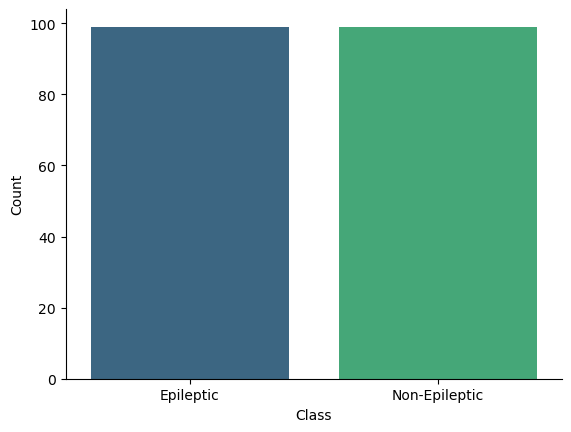

In [9]:
sns.countplot(x=df['stat'].replace({0: 'Non-Epileptic', 1: 'Epileptic'}), palette='viridis')

plt.title('')
# Label axes
plt.xlabel('Class')
plt.ylabel('Count')

sns.despine()

plt.savefig('class_distribution.jpeg')
plt.show()

In [10]:
if 'ID' in df.columns:
    df = df.drop(columns=['ID'])

In [11]:
negative=df[df['stat']==0].describe().T
negative.head(10)

,count,mean,std,min,25%,50%,75%,max
pow_d,99.0,2615.103489,3107.710248,0.030182,349.15500,1153.50000,3736.55000,11428.0000
fr_d,99.0,2.061611,0.286644,1.446900,1.86165,2.12920,2.32190,2.3852
cd1_d,99.0,-12.750903,198.739778,-335.630000,-205.22000,23.06400,169.76500,260.5000
cd2_d,99.0,-25.757874,113.596218,-214.140000,-105.13500,-37.74500,54.23250,196.1100
cd3_d,99.0,3.516753,134.122987,-216.040000,-100.16750,-16.39600,75.04150,257.3600
cd4_d,99.0,0.368774,240.760167,-435.300000,-174.62000,0.37717,255.03000,325.8300
cd5_d,99.0,15.240282,171.370158,-323.610000,-148.55000,99.93500,140.68000,240.0500
cd6_d,99.0,1.392392,95.476141,-180.490000,-78.71700,10.55300,83.34150,153.4700
pow_t,99.0,3455.517900,4108.441711,0.472900,385.27000,1707.30000,5668.30000,16129.0000
fr_t,99.0,2.131056,0.234960,1.447200,2.00370,2.17180,2.30415,2.4737


In [12]:
positive=df[df['stat']==1].describe().T
positive.head(10)

,count,mean,std,min,25%,50%,75%,max
pow_d,99.0,244.497074,357.481986,0.001038,17.514500,85.62200,343.40000,1388.5000
fr_d,99.0,0.358992,1.839424,-5.658300,-0.369035,0.88861,1.68105,2.2155
cd1_d,99.0,2.085371,74.266983,-112.050000,-29.755500,0.81875,13.87500,238.3000
cd2_d,99.0,16.827667,48.929748,-47.462000,-12.424500,2.21320,46.46300,116.8800
cd3_d,99.0,-17.960547,44.089958,-115.230000,-26.123500,0.40325,3.19240,28.2450
cd4_d,99.0,-35.116557,121.683015,-301.740000,-80.425000,-1.25500,39.82200,195.1100
cd5_d,99.0,-28.096043,99.127743,-257.020000,-40.079000,-1.65650,19.09850,109.4100
cd6_d,99.0,-5.059683,8.700519,-17.545000,-13.376500,-1.46100,2.07605,7.8563
pow_t,99.0,820.753913,1143.248056,0.002779,5.691550,259.95000,1290.55000,4203.7000
fr_t,99.0,0.399071,2.021130,-5.288400,-0.590080,1.19070,2.06025,2.3379


In [13]:
# create dataframe
feat_means=pd.DataFrame({'negative':negative[:-1]['mean'], 'positive':positive[:-1]['mean']})

# calculate fold changes and add to dataframe
fc=(feat_means.positive - feat_means.negative)/feat_means.negative
feat_means['fc']=fc

# calculate Log2 of fold change and add to data frame
log2_fc=np.log2(np.abs(fc))
feat_means['log2_fc']=log2_fc
feat_means=feat_means.reset_index().rename(columns={'index':'feature'})

# sort dataframe according to fold change
feat_means['abs']=abs(feat_means['fc'])

# Sort by fold absolute change
feat_means=feat_means.sort_values(by=['abs'],ascending=False).drop(columns=['abs'])
feat_means.head(10)


,feature,negative,positive,fc,log2_fc
5,cd4_d,0.368774,-35.116557,-96.225028,6.588340
4,cd3_d,3.516753,-17.960547,-6.107140,2.610497
7,cd6_d,1.392392,-5.059683,-4.633807,2.212198
35,cd2_g,0.027622,-0.099949,-4.618415,2.207398
36,cd3_g,-0.613175,1.524134,-3.485642,1.801424
29,cd4_b,1.203259,-2.871479,-3.386419,1.759761
6,cd5_d,15.240282,-28.096043,-2.843538,1.507687
30,cd5_b,3.201833,-5.717414,-2.785669,1.478024
38,cd5_g,2.253121,-3.533074,-2.568080,1.360690
34,cd1_g,-0.109979,0.166489,-2.513827,1.329885


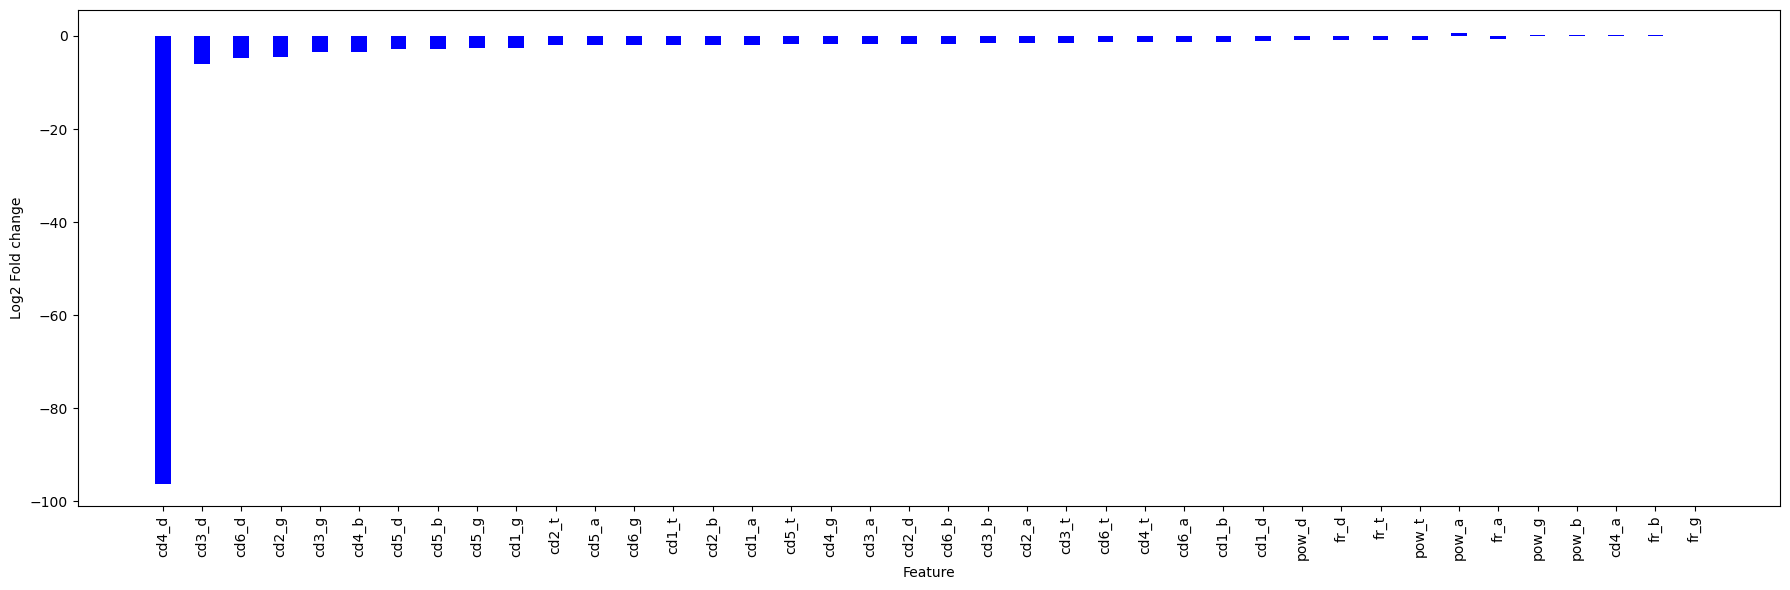

In [14]:
plt.figure(figsize=(18,6))
plt.bar(feat_means['feature'],feat_means['fc'], color ='blue',width = 0.4)
plt.xticks(feat_means['feature'], rotation ='vertical')
plt.xlabel('Feature')
plt.ylabel('Log2 Fold change')
plt.tight_layout()

# save plot
plt.savefig('fold_changes.jpeg')

In [15]:
features=df.drop(columns=['stat']).columns
features

Index(['pow_d', 'fr_d', 'cd1_d', 'cd2_d', 'cd3_d', 'cd4_d', 'cd5_d', 'cd6_d',
       'pow_t', 'fr_t', 'cd1_t', 'cd2_t', 'cd3_t', 'cd4_t', 'cd5_t', 'cd6_t',
       'pow_a', 'fr_a', 'cd1_a', 'cd2_a', 'cd3_a', 'cd4_a', 'cd5_a', 'cd6_a',
       'pow_b', 'fr_b', 'cd1_b', 'cd2_b', 'cd3_b', 'cd4_b', 'cd5_b', 'cd6_b',
       'pow_g', 'fr_g', 'cd1_g', 'cd2_g', 'cd3_g', 'cd4_g', 'cd5_g', 'cd6_g'],
      dtype='object')

<Axes: xlabel='stat', ylabel='cd4_d'>

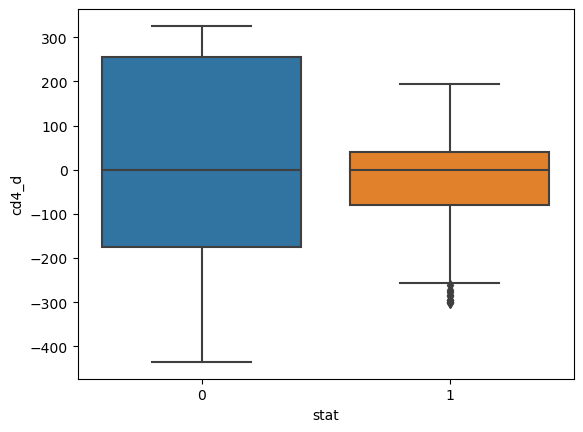

In [16]:
sns.boxplot(x = df['stat'],y = df['cd4_d'])

<Axes: xlabel='stat', ylabel='cd3_d'>

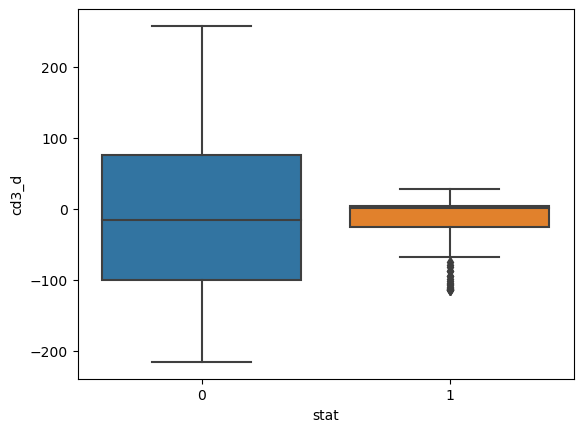

In [17]:
sns.boxplot(x = df['stat'],y = df['cd3_d'])

<Axes: xlabel='stat', ylabel='cd2_d'>

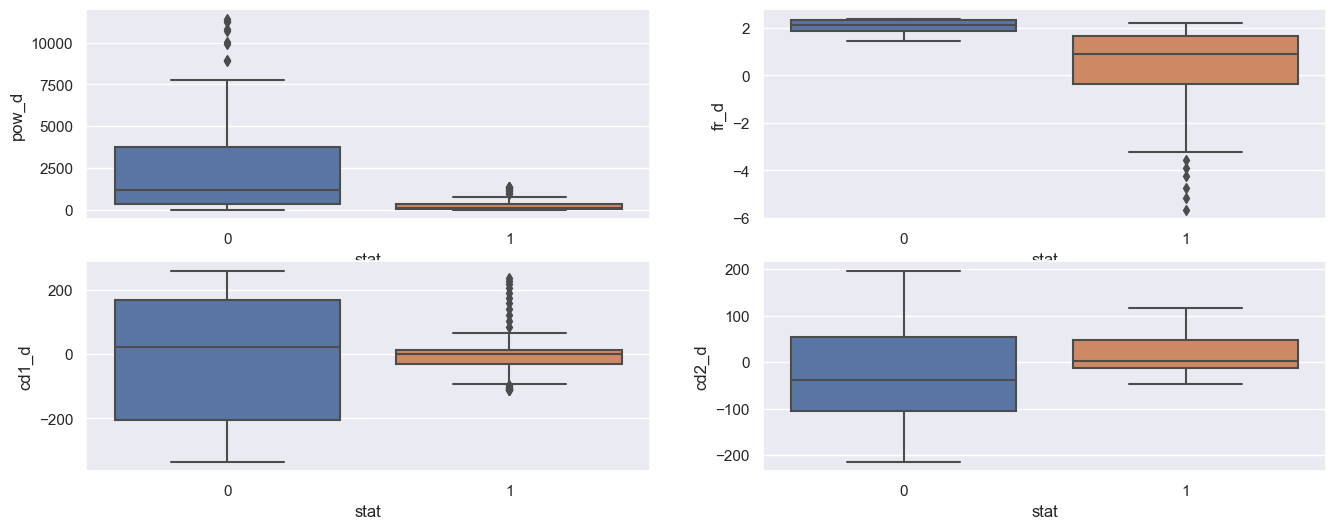

In [18]:
sns.set()

#define plotting region (2 rows, 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(16,6))

#create boxplot in each subplot
sns.boxplot(x = df['stat'],y = df[features[0]], ax=axes[0,0])
sns.boxplot(x = df['stat'],y = df[features[1]], ax=axes[0,1])
sns.boxplot(x = df['stat'],y = df[features[2]], ax=axes[1,0])
sns.boxplot(x = df['stat'],y = df[features[3]], ax=axes[1,1])

<Axes: >

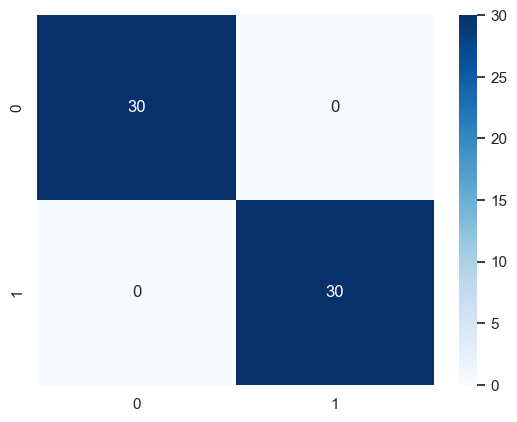

In [22]:
X, y = df.drop(columns=['stat']), df['stat'] 

# split data into train & test sets: 70% training & 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y) 

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

# Create a RandomForest classiefer
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data sets
clf.fit(X_train, y_train)

# predict outcomes of the test dataset using the trained classifier
y_pred=clf.predict(X_test)

# Get the confusion metrix from predicted labels and actual labels
cf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
sns.heatmap(cf_matrix, annot=True, fmt='', cmap='Blues', cbar=True)

In [23]:
print(X.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(198, 40) (138, 40) (60, 40) (138,) (60,)


In [24]:
tp=cf_matrix[1,1]
fp=cf_matrix[0,1]
fn=cf_matrix[1,0]
tn=cf_matrix[0,0]

In [25]:
accuracy=( (tp+tn)/(tp+fp+fn+tn))*100
print(round(accuracy,3))

100.0


In [26]:
Sensitivity=(tp/(tp+fn))*100
print(round(Sensitivity,3))

100.0


In [27]:
Specificity=(tn/(tn+fp))*100
print(round(Specificity,3))

100.0


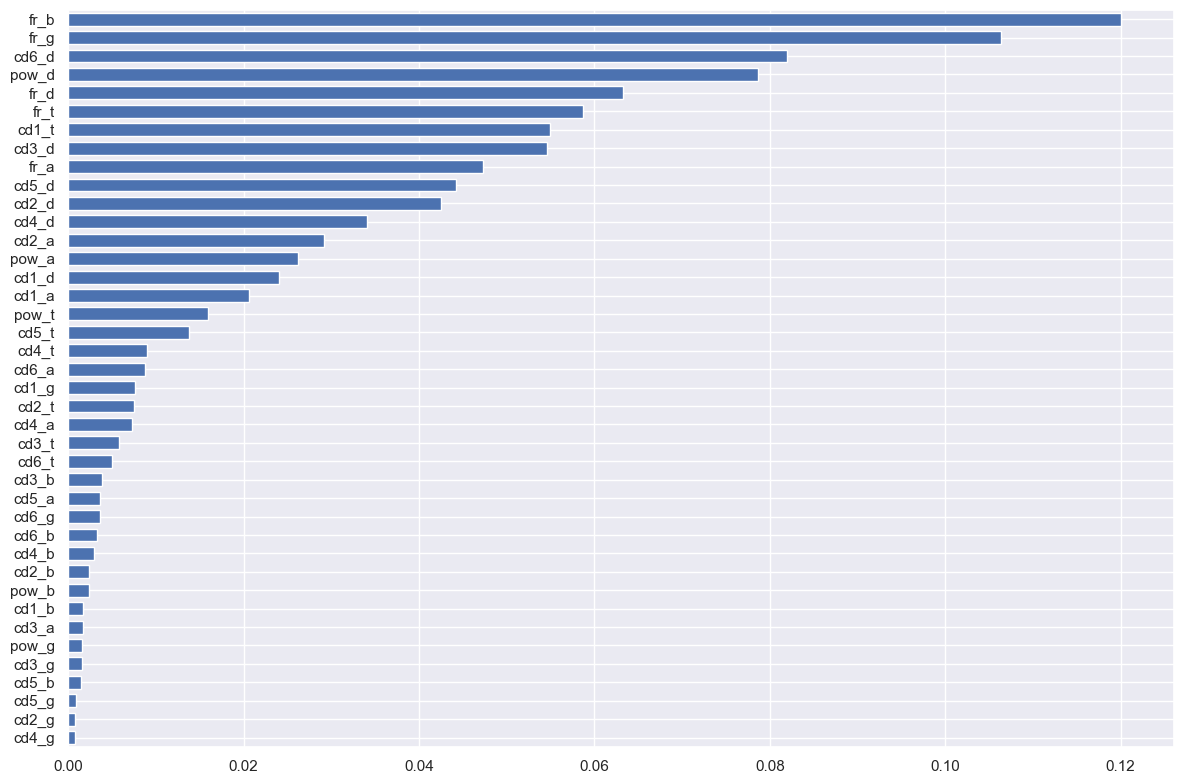

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

# Ensure the model is trained
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Compute permutation importance
result = permutation_importance(clf, X_train, y_train, n_repeats=10, random_state=42)
perm_sorted_idx = result.importances_mean.argsort()

# Sort feature importance from tree-based model
tree_importance_sorted_idx = np.argsort(clf.feature_importances_)
tree_indices = np.arange(0, len(clf.feature_importances_)) + 0.5

# Plot Feature Importance
fig, ax1 = plt.subplots(1, 1, figsize=(12, 8))
ax1.barh(tree_indices, clf.feature_importances_[tree_importance_sorted_idx], height=0.7)
ax1.set_yticks(tree_indices)

ax1.set_yticklabels(X.columns[tree_importance_sorted_idx])

ax1.set_ylim((0, len(clf.feature_importances_)))
fig.tight_layout()
plt.show()


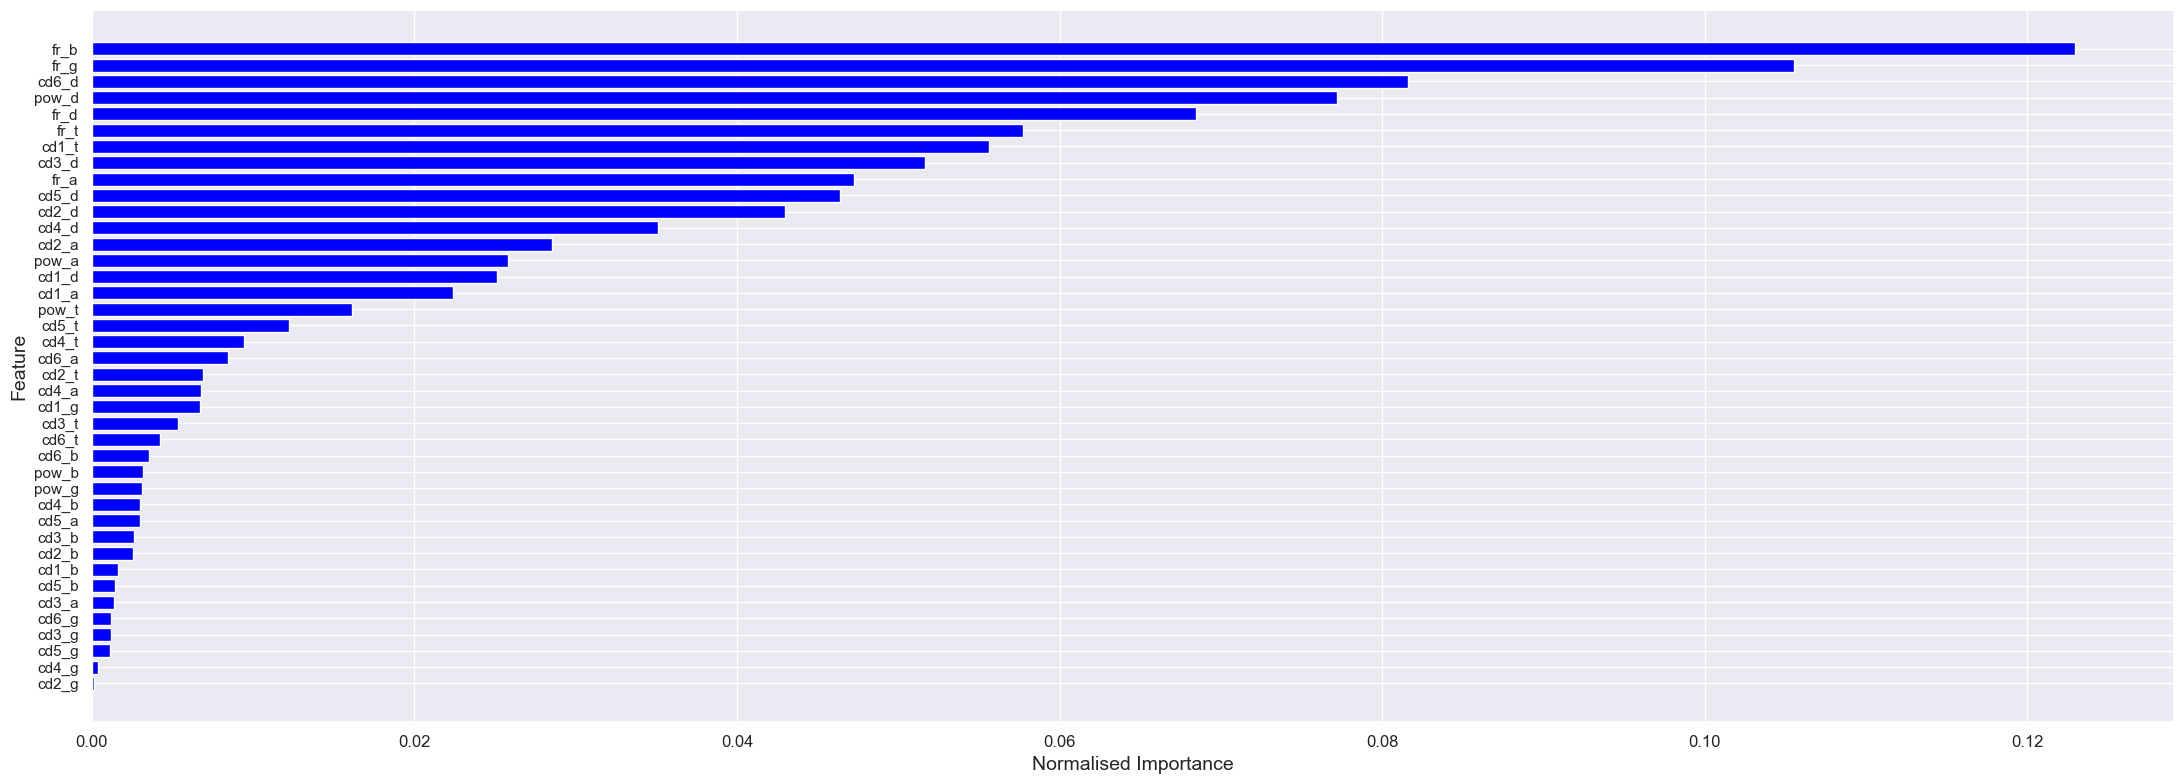

In [29]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
# Define estimator
estimator = RandomForestClassifier(n_estimators=100, max_depth=7, min_samples_leaf=2, min_samples_split=2, random_state=42)

# Train the model
estimator.fit(X_train, y_train)

# Ensure we use the correct feature names
feature_names = X.columns  # Use original column names, not X_train (which may be a NumPy array)

# Create a DataFrame of feature importance
imp = pd.DataFrame({'feature': feature_names, 'importance': estimator.feature_importances_}).sort_values(by='importance', ascending=False)

# Get significant features (can adjust threshold if needed)
significant_features = imp[imp.importance > 0.0]  # This is redundant, as all features are non-negative

# Plot feature importance
plt.figure(figsize=(22, 8))
plt.barh(imp['feature'], imp['importance'], color='blue')
plt.xlabel('Normalised Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
#plt.title('Features Ranked by Normalised Importance', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=11)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


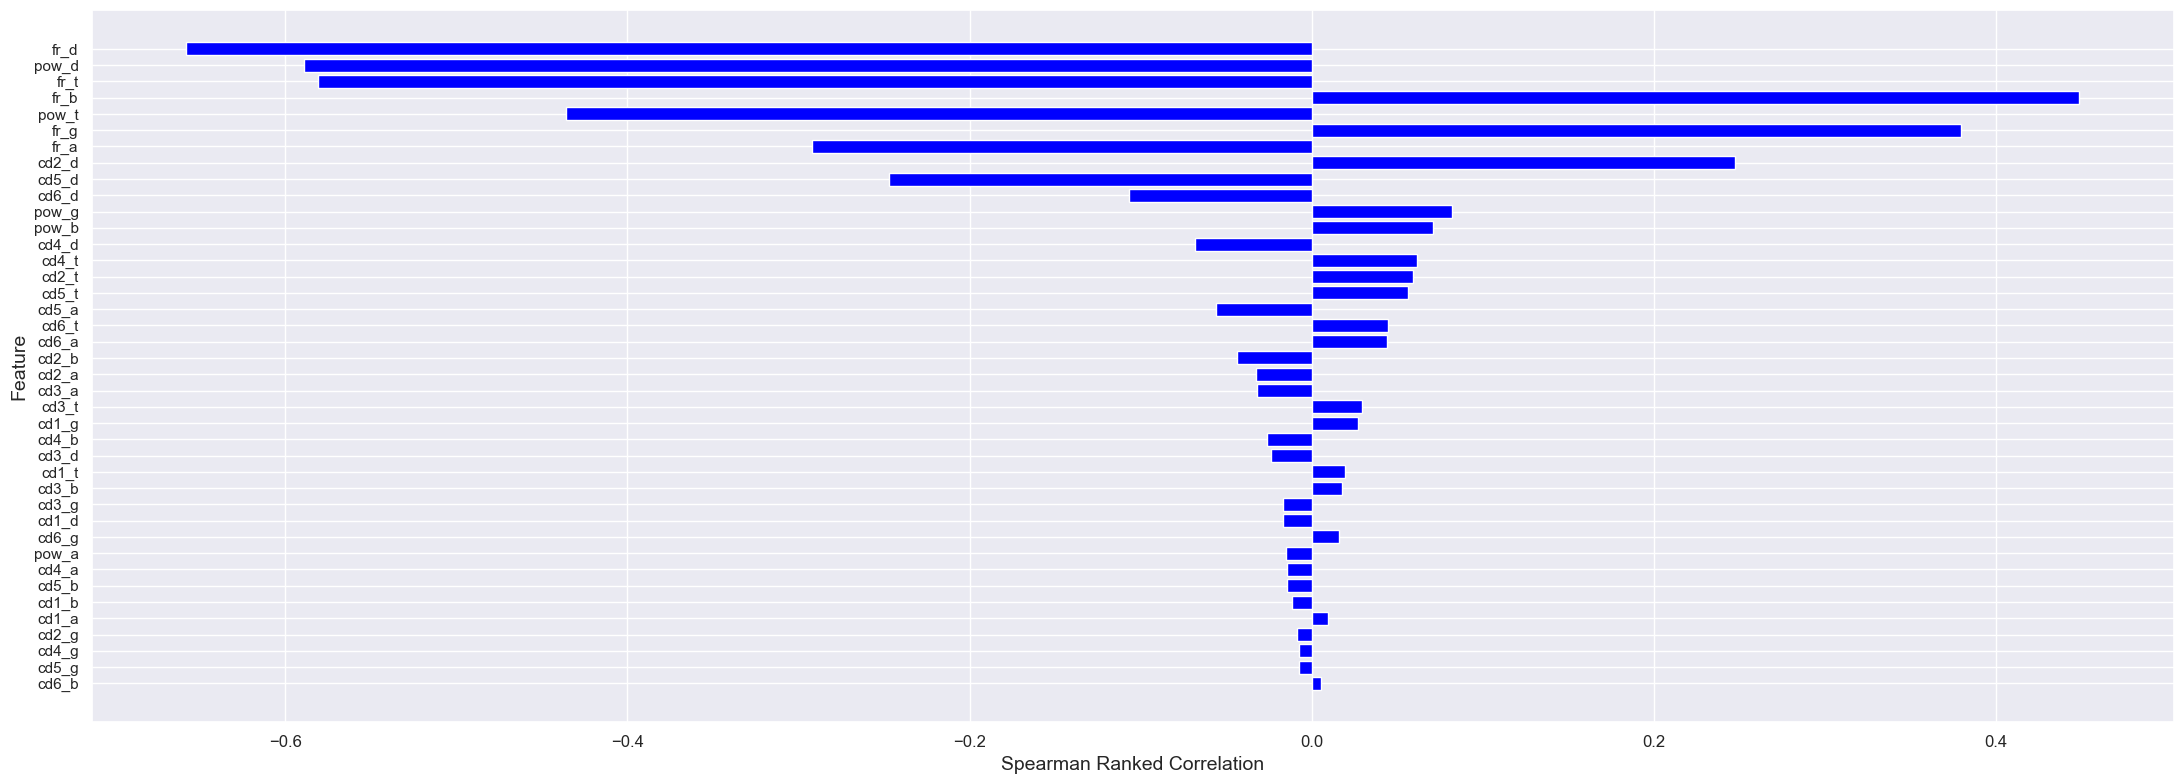

In [30]:
# Compute Spearman correlation
correlation_mat = df.corr(method='spearman')
target_variable = 'stat' 

# Create a DataFrame ranking features by correlation with the target
correlation_feature_rank = correlation_mat[[target_variable]].drop(index=target_variable).reset_index()
correlation_feature_rank.columns = ['feature', 'cor']

# Compute absolute correlation values for ranking
correlation_feature_rank['abs'] = correlation_feature_rank['cor'].abs()

# Sort by absolute correlation (highest-ranked first)
ranked = correlation_feature_rank.sort_values(by='abs', ascending=False).drop(columns=['abs'])

# Plot ranked feature correlations
plt.figure(figsize=(22, 8))
plt.barh(ranked['feature'], ranked['cor'], color='blue')
plt.xlabel('Spearman Ranked Correlation', fontsize=14)
plt.ylabel('Feature', fontsize=14)
#plt.title('Features Ranked by Correlation with Target', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=11)
plt.gca().invert_yaxis()  # Ensures the most important features are at the top
plt.tight_layout()
plt.show()


In [31]:
correlation_feature_rank[:-1]

,feature,cor,abs
0,pow_d,-0.589110,0.589110
1,fr_d,-0.657856,0.657856
2,cd1_d,-0.016524,0.016524
3,cd2_d,0.247679,0.247679
4,cd3_d,-0.023769,0.023769
5,cd4_d,-0.067950,0.067950
6,cd5_d,-0.246972,0.246972
7,cd6_d,-0.106653,0.106653
8,pow_t,-0.435890,0.435890
9,fr_t,-0.581069,0.581069


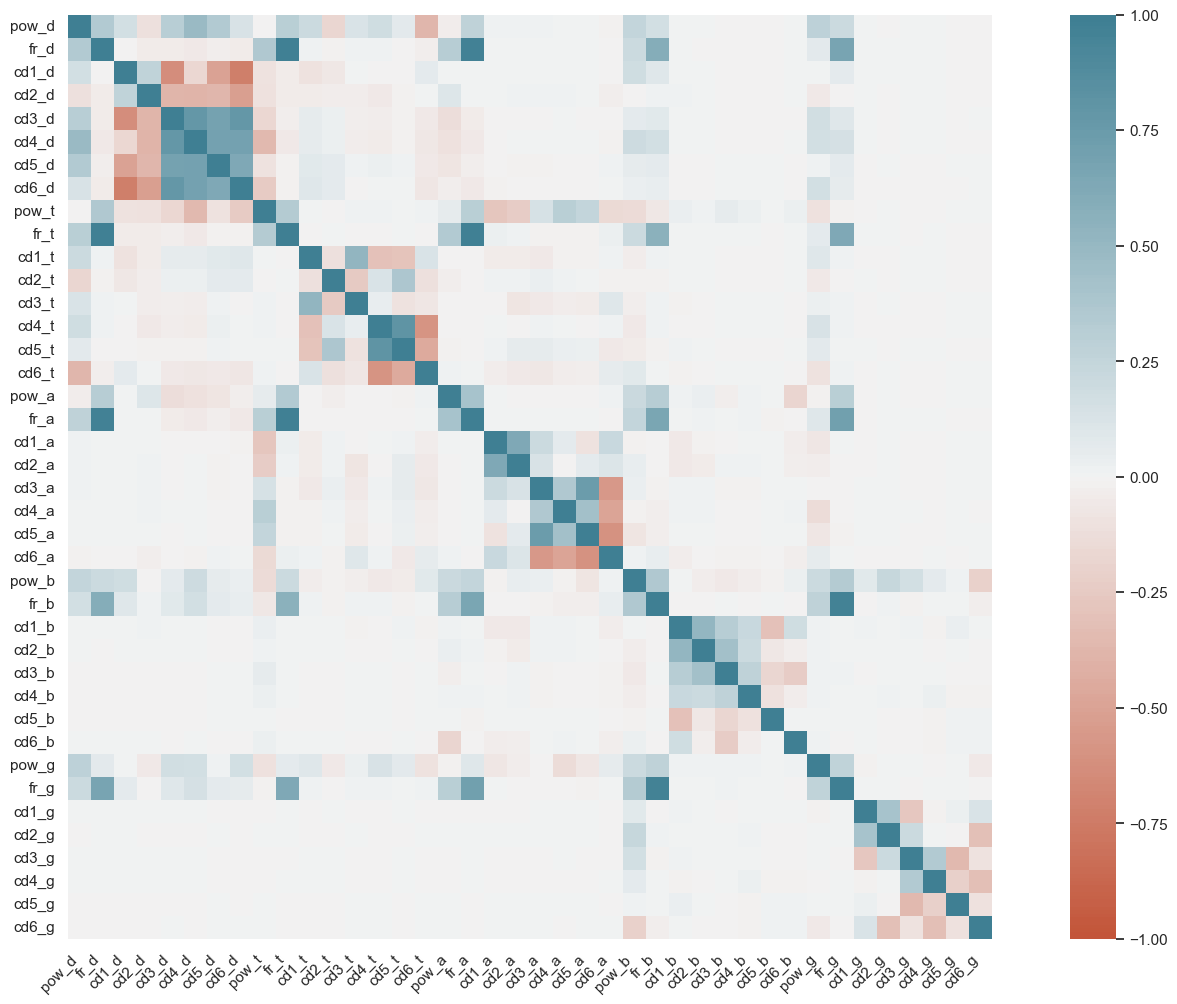

In [32]:
corr = df.drop(columns=['stat']).corr()
fig, ax = plt.subplots(figsize=(20,12))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

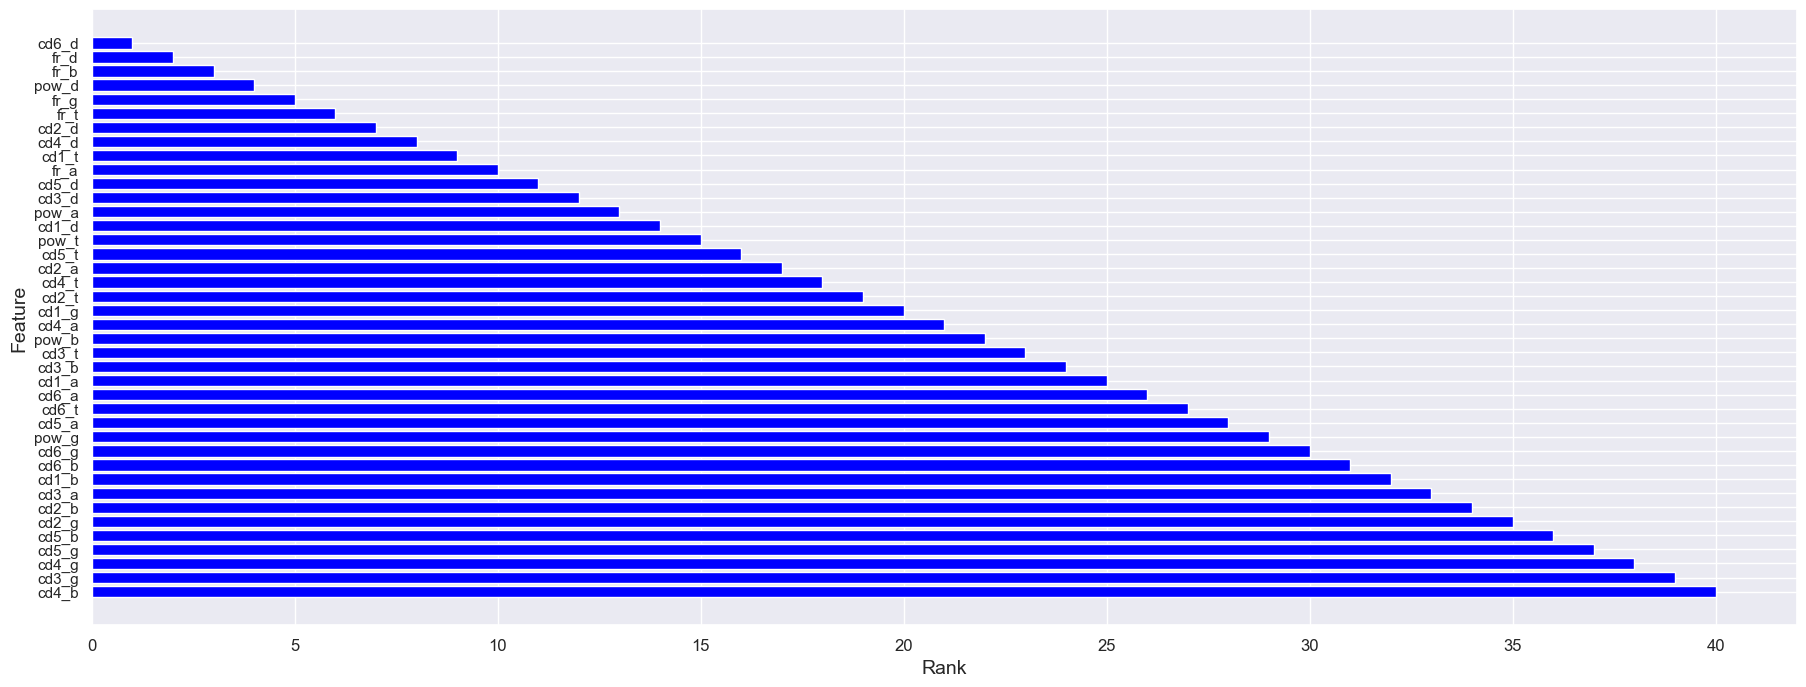

In [33]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

# Ensure dataset is loaded
data, target = df.drop(columns=['stat']), df['stat']  # 'stat' is the target column

# Define model for feature selection
estimator = RandomForestClassifier(n_estimators=100, random_state=42)

# Apply RFE (Recursive Feature Elimination)
rfe = RFE(estimator, n_features_to_select=1)
rfe.fit(data, target)

# Get feature rankings
rf_ranking = rfe.ranking_
features = data.columns

# Store feature rankings in DataFrame
rfe_feature_ranking = pd.DataFrame({'feature': features, 'rank': rf_ranking})

# Sort features by ranking
ranked_rfe = rfe_feature_ranking.sort_values(by=['rank'], ascending=True)

# Plot feature rankings
plt.figure(figsize=(22, 8))
plt.barh(ranked_rfe['feature'], ranked_rfe['rank'], color='blue')
plt.xlabel('Rank', fontsize=14)
plt.ylabel('Feature', fontsize=14)
#plt.title('Features Ranked by Importance (RFE)', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=11)
plt.gca().invert_yaxis()  # Ensures most important features appear at the top

In [ ]:
 #pip install shap

Shape of X.columns: 41
Shape of SHAP importance scores after fix: (41,)


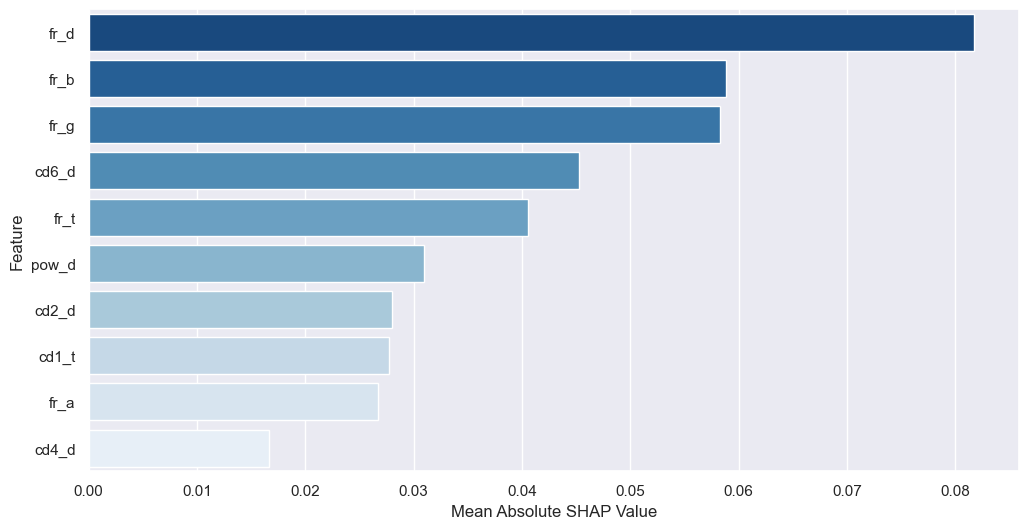

<Figure size 640x480 with 0 Axes>

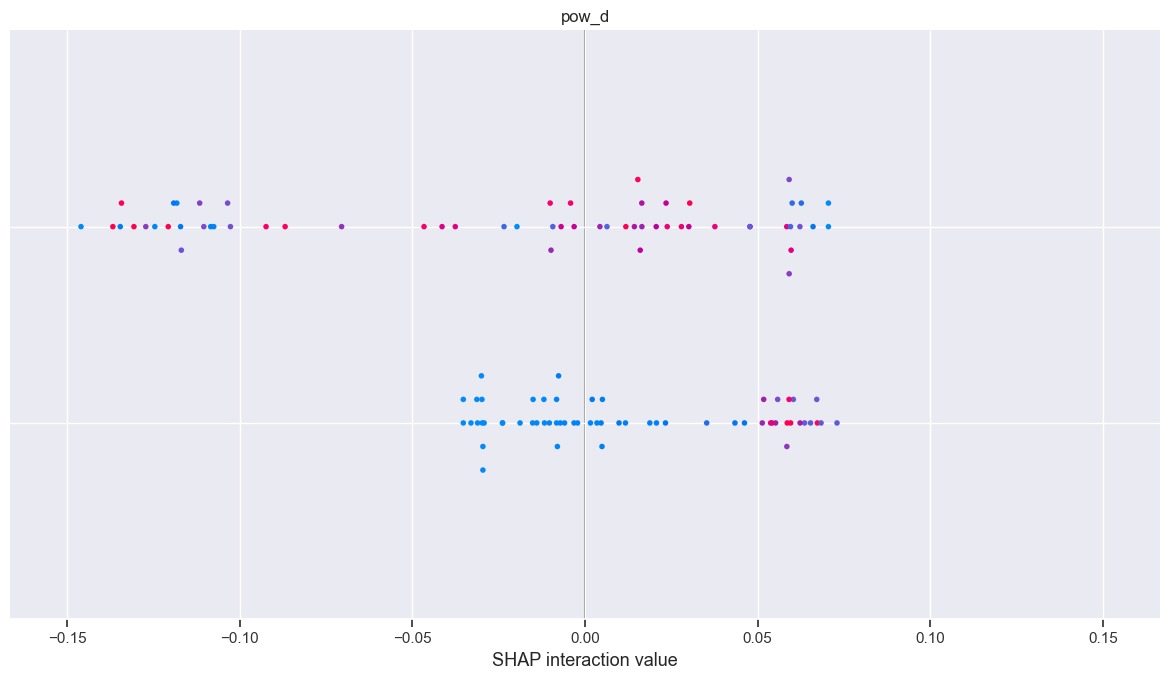

Shape of selected SHAP values: (41, 2)
Shape of selected X_test sample: (1, 41)


DimensionError: Length of features is not equal to the length of shap_values!

In [34]:
# Import required libraries
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv("Epileptic_featured_data.csv")  # Ensure correct dataset

# Define target variable (Ensure 'stat' is correct)
X, y = df.drop(columns=['stat']), df['stat']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Train a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Create SHAP explainer
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# **Fix: Ensure SHAP values are properly selected**
if isinstance(shap_values, list):  # If multi-class, select SHAP values for class 1
    shap_values_selected = shap_values[1]  # Selecting positive class
else:
    shap_values_selected = shap_values  # Binary classification case

# **Fix: Aggregate SHAP importance scores across classes**
shap_values_mean = np.mean(np.abs(shap_values_selected), axis=0)  # Mean absolute values per feature

# **Fix: Reduce from (41,2) → (41,)**
if shap_values_mean.ndim == 2:  
    shap_values_mean = np.mean(shap_values_mean, axis=1)  # Average SHAP values across both classes

# **Ensure shape matches**
print(f"Shape of X.columns: {len(X.columns)}")  # Should be 41
print(f"Shape of SHAP importance scores after fix: {shap_values_mean.shape}")  # Should be 41

# **Ensure SHAP values are 1D before DataFrame creation**
if shap_values_mean.shape[0] == len(X.columns):
    # Create a DataFrame for SHAP importance
    shap_importance_df = pd.DataFrame({"Feature": X.columns, "SHAP Importance": shap_values_mean})
    shap_importance_df = shap_importance_df.sort_values(by="SHAP Importance", ascending=False)

    # 1️⃣ **SHAP Feature Importance (Bar Chart)**
    plt.figure(figsize=(12, 6))
    sns.barplot(x=shap_importance_df["SHAP Importance"][:10], y=shap_importance_df["Feature"][:10], palette="Blues_r")
    plt.xlabel("Mean Absolute SHAP Value")
    plt.ylabel("Feature")
    #plt.title("Top 10 SHAP Feature Importance")
    plt.show()

    # 2️⃣ **SHAP Summary Plot (How Features Impact Predictions)**
    shap.summary_plot(shap_values_selected, X_test, feature_names=X.columns)

    # 3️⃣ **SHAP Force Plot (Explaining Individual Prediction)**
    shap.initjs()  # Initialize JS for SHAP visualization

    # **Fix: Select only ONE sample for the force plot**
    sample_index = 0  # Choose any sample index (e.g., 0, 5, 10)

    # **Fix: Ensure feature and SHAP values match in length**
    print(f"Shape of selected SHAP values: {shap_values_selected[sample_index].shape}")
    print(f"Shape of selected X_test sample: {X_test.iloc[[sample_index]].shape}")  # Double brackets for DataFrame

    shap.force_plot(
        explainer.expected_value if isinstance(explainer.expected_value, float) else explainer.expected_value[1], 
        shap_values_selected[sample_index].reshape(1, -1),  # Ensure SHAP values are 2D
        X_test.iloc[[sample_index]]  # Ensure it's a DataFrame (double brackets)
    )

else:
    print("❌ ERROR: SHAP values do not match the number of features! Check preprocessing steps.")


In [33]:
shap_importance_df

,Feature,SHAP Importance
2,fr_d,0.081786
26,fr_b,0.058870
34,fr_g,0.058311
8,cd6_d,0.045280
10,fr_t,0.040561
1,pow_d,0.030926
4,cd2_d,0.027984
11,cd1_t,0.027721
18,fr_a,0.026733
6,cd4_d,0.016644


In [34]:
# Calculate the unique counts in each column
# extract the data excluding the label 
data=df.drop(columns=['stat'])

# count the number of unique values in each column or feature -- ignore 'index' which is the binary class
unique_counts = data.nunique()

# print unique stats
unique_counts

ID       198
pow_d    198
fr_d     196
cd1_d    198
cd2_d    198
cd3_d    198
cd4_d    198
cd5_d    198
cd6_d    198
pow_t    198
fr_t     196
cd1_t    198
cd2_t    197
cd3_t    198
cd4_t    198
cd5_t    198
cd6_t    198
pow_a    198
fr_a     198
cd1_a    198
cd2_a    198
cd3_a    198
cd4_a    198
cd5_a    198
cd6_a    198
pow_b    198
fr_b     196
cd1_b    198
cd2_b    198
cd3_b    198
cd4_b    198
cd5_b    198
cd6_b    198
pow_g    198
fr_g     197
cd1_g    198
cd2_g    198
cd3_g    198
cd4_g    198
cd5_g    198
cd6_g    198
dtype: int64

In [35]:
unique_stats=pd.DataFrame(unique_counts).reset_index().rename(columns = {'index': 'feature', 0: 'unique_counts'})
unique_stats

,feature,unique_counts
0,ID,198
1,pow_d,198
2,fr_d,196
3,cd1_d,198
4,cd2_d,198
5,cd3_d,198
6,cd4_d,198
7,cd5_d,198
8,cd6_d,198
9,pow_t,198


In [36]:
unique_stats = unique_stats.sort_values('unique_counts', ascending = False)
unique_stats

,feature,unique_counts
0,ID,198
30,cd4_b,198
22,cd4_a,198
23,cd5_a,198
24,cd6_a,198
25,pow_b,198
27,cd1_b,198
28,cd2_b,198
29,cd3_b,198
31,cd5_b,198


In [37]:
# set colinearity threshold
correlation_threshold=0.80

# extract just the data without class label
data=df.drop(columns=['stat'])

# calculate correlation matrix
corr_matrix = data.corr()

# Extract the upper triangle of the correlation matrix -- inter-correlations or colinearity
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k = 1).astype(bool))

# determine features that have a colinearity above threshold
# Need to use the absolute value -- to determine colineasrity
to_drop_colinear = [column for column in upper.columns if any(upper[column].abs() > correlation_threshold)]
to_drop_colinear

['fr_t', 'cd5_t', 'fr_a', 'fr_g']

In [38]:
record_collinear = pd.DataFrame(columns = ['drop_feature', 'corr_feature', 'corr_value'])

In [39]:
for column in to_drop_colinear:

    # Find the correlated features
    corr_features = list(upper.index[upper[column].abs() > correlation_threshold])

    # Find the correlated values
    corr_values = list(upper[column][upper[column].abs() > correlation_threshold])
    drop_features = [column for _ in range(len(corr_features))]    

    # Record the information (need a temp df for now)
    temp_df = pd.DataFrame.from_dict({'drop_feature': drop_features,
                                     'corr_feature': corr_features,
                                     'corr_value': corr_values})

    # Add to dataframe
    #record_collinear = record_collinear.append(temp_df, ignore_index = True)
    record_collinear = pd.concat([record_collinear, temp_df], ignore_index=True)


C:\Users\rashford1\AppData\Local\Temp\ipykernel_19544\2111871337.py:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  record_collinear = pd.concat([record_collinear, temp_df], ignore_index=True)


In [40]:
collinear = record_collinear.sort_values(by='corr_value')
collinear

,drop_feature,corr_feature,corr_value
1,cd5_t,cd4_t,0.805549
4,fr_g,fr_b,0.966943
2,fr_a,fr_d,0.976291
3,fr_a,fr_t,0.980431
0,fr_t,fr_d,0.983228


In [41]:
X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_test_df = pd.DataFrame(X_test, columns=X.columns)

primary_features = ['fr_d', 'fr_b', 'cd6_d', 'fr_g', 'pow_d']

# Create reduced datasets
X_train_reduced = X_train_df[primary_features]
X_test_reduced = X_test_df[primary_features]

# Print shapes to confirm
print("Reduced X_train shape:", X_train_reduced.shape)
print("Reduced X_test shape:", X_test_reduced.shape)

Reduced X_train shape: (138, 5)
Reduced X_test shape: (60, 5)


Calculating accuracies for reduced dataset...
LR: 0.9650 (0.0391)
LDA: 0.9700 (0.0400)
KNN: 0.8426 (0.0755)
DT: 0.9850 (0.0229)
GNB: 0.9392 (0.0379)
SVM: 0.7163 (0.0876)
RF: 0.9900 (0.0200)
BG: 0.9900 (0.0200)
ET: 0.9900 (0.0200)
SGDC: 0.5253 (0.0840)


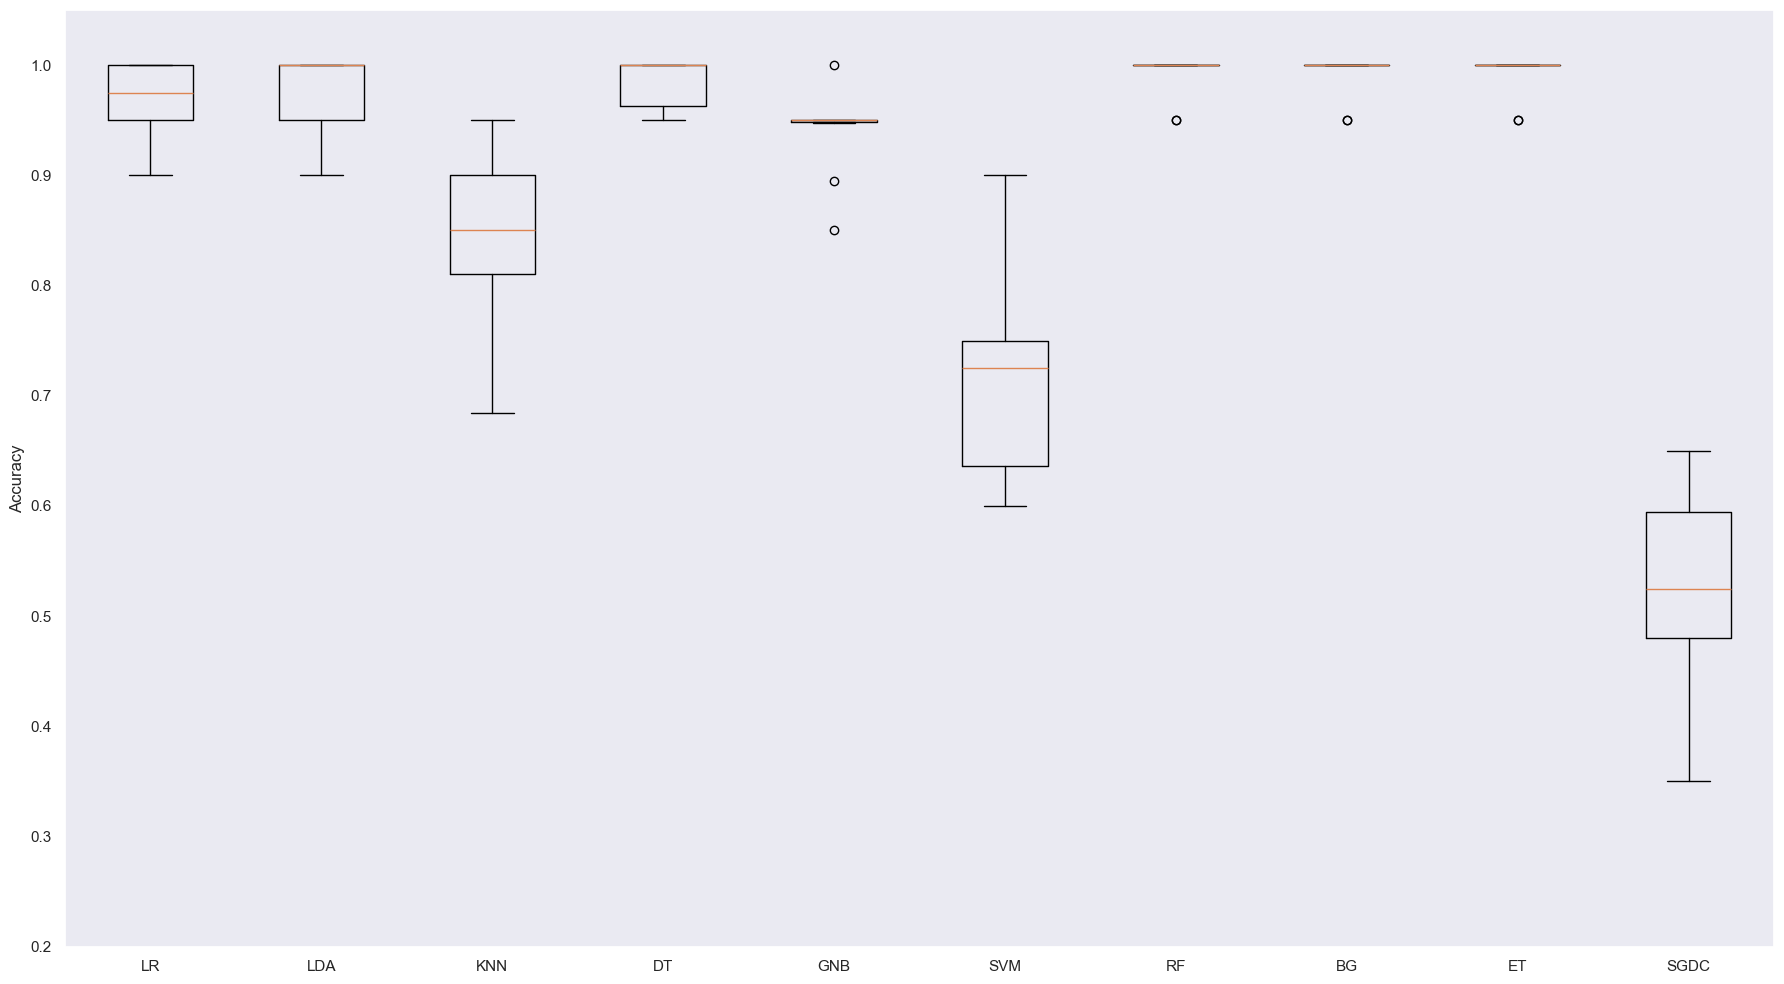

In [42]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier
from sklearn.linear_model import SGDClassifier

seed = 7

# Define models for comparison
models = [
    ('LR', LogisticRegression(max_iter=1000)), 
    ('LDA', LinearDiscriminantAnalysis()),
    ('KNN', KNeighborsClassifier()),
    ('DT', DecisionTreeClassifier(random_state=seed)),
    ('GNB', GaussianNB()),
    ('SVM', SVC(kernel='poly', random_state=seed)),
    ('RF', RandomForestClassifier(random_state=seed)),
    ('BG', BaggingClassifier(random_state=seed)),
    ('ET', ExtraTreesClassifier(random_state=seed)),
    ('SGDC', SGDClassifier(max_iter=1000, tol=1e-3, random_state=seed))
]

# Combine the reduced train dataset for cross-validation
X_reduced = pd.concat([X_train_reduced, X_test_reduced], axis=0)
y_reduced = pd.concat([y_train, y_test], axis=0)

# Perform cross-validation
results = []
names = []
scoring = 'accuracy'

print('Calculating accuracies for reduced dataset...')
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
    cv_results = model_selection.cross_val_score(model, X_reduced, y_reduced, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print(f"{name}: {cv_results.mean():.4f} ({cv_results.std():.4f})")

# Boxplot for algorithm comparison
plt.figure(figsize=(18, 10))
plt.boxplot(results)
plt.xticks(range(1, len(names) + 1), names)
plt.ylabel('Accuracy')
plt.ylim(0.2, 1.05) 
plt.grid()
plt.tight_layout()
plt.savefig('model_boxplot.png', dpi=300)
plt.show()

In [43]:
# Random Forest hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy')
rf_grid.fit(X_train_reduced, y_train)

print("Random Forest Best Params:", rf_grid.best_params_)
print("Best RF Accuracy:", rf_grid.best_score_)


Random Forest Best Params: {'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 50}
Best RF Accuracy: 0.9928571428571429


In [44]:
# Decision Tree hyperparameter tuning
from sklearn.tree import DecisionTreeClassifier

param_grid_dt = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=5, scoring='accuracy')
dt_grid.fit(X_train_reduced, y_train)

print("Decision Tree Best Params:", dt_grid.best_params_)
print("Best DT Accuracy:", dt_grid.best_score_)

Decision Tree Best Params: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1}
Best DT Accuracy: 0.9857142857142858


In [45]:
# K-Nearest Neighbors hyperparameter tuning
from sklearn.neighbors import KNeighborsClassifier

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn_grid = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy')
knn_grid.fit(X_train_reduced, y_train)

print("KNN Best Params:", knn_grid.best_params_)
print("Best KNN Accuracy:", knn_grid.best_score_)

KNN Best Params: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
Best KNN Accuracy: 0.9055555555555556


In [46]:
# Support Vector Machine hyperparameter tuning
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf'],
    'gamma': ['scale', 'auto']
}

svm_grid = GridSearchCV(SVC(random_state=42), param_grid_svm, cv=5, scoring='accuracy')
svm_grid.fit(X_train_reduced, y_train)

print("SVM Best Params:", svm_grid.best_params_)
print("Best SVM Accuracy:", svm_grid.best_score_)

SVM Best Params: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Best SVM Accuracy: 0.9785714285714284


Decision Tree Best Params: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1}
Best DT Accuracy (CV): 0.9857142857142858

Decision Tree Corrected Evaluation Metrics:
Accuracy: 0.9833
Precision: 0.9677
Recall: 1.0000
F1 Score: 0.9836
ROC-AUC Score: 0.9833


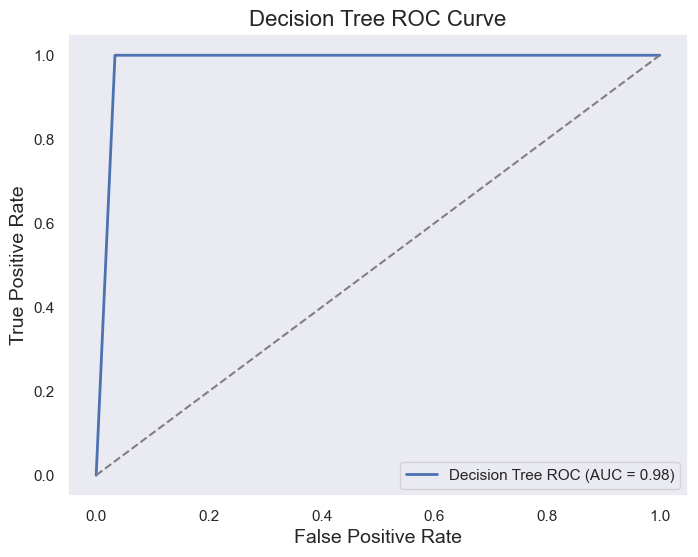

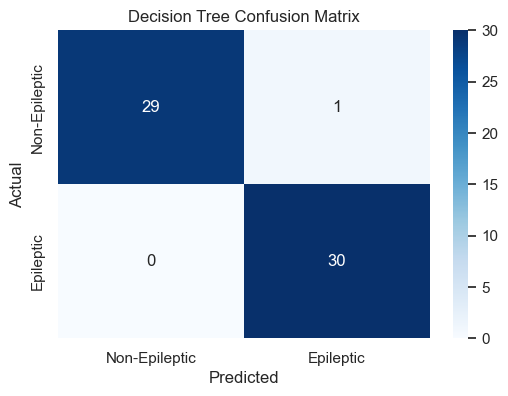

In [47]:
# Decision Tree hyperparameter tuning and evaluation

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure labels are binary (0,1)
y_train_binary = y_train.map({1: 1, 2: 0})
y_test_binary = y_test.map({1: 1, 2: 0})

# Define hyperparameter grid
param_grid_dt = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Initialize and fit GridSearchCV
dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=5, scoring='accuracy')
dt_grid.fit(X_train_reduced, y_train_binary)

# Best parameters and accuracy
print("Decision Tree Best Params:", dt_grid.best_params_)
print("Best DT Accuracy (CV):", dt_grid.best_score_)

# Evaluate on test set with best estimator
y_pred_dt = dt_grid.predict(X_test_reduced)
y_proba_dt = dt_grid.predict_proba(X_test_reduced)[:, 1]

# Calculate corrected evaluation metrics explicitly
accuracy_dt = accuracy_score(y_test_binary, y_pred_dt)
precision_dt = precision_score(y_test_binary, y_pred_dt)
recall_dt = recall_score(y_test_binary, y_pred_dt)
f1_dt = f1_score(y_test_binary, y_pred_dt)
roc_auc_dt = roc_auc_score(y_test_binary, y_proba_dt)

# Print corrected evaluation metrics
print("\nDecision Tree Corrected Evaluation Metrics:")
print(f"Accuracy: {accuracy_dt:.4f}")
print(f"Precision: {precision_dt:.4f}")
print(f"Recall: {recall_dt:.4f}")
print(f"F1 Score: {f1_dt:.4f}")
print(f"ROC-AUC Score: {roc_auc_dt:.4f}")

# ROC Curve visualisation
fpr_dt, tpr_dt, _ = roc_curve(y_test_binary, y_proba_dt)

plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree ROC (AUC = {roc_auc_dt:.2f})', linewidth=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Decision Tree ROC Curve', fontsize=16)
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Confusion Matrix visualization
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test_binary, y_pred_dt)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Epileptic', 'Epileptic'], yticklabels=['Non-Epileptic', 'Epileptic'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Confusion Matrix')
plt.show()

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure binary labels
y_train_binary = y_train.map({1: 1, 2: 0})
y_test_binary = y_test.map({1: 1, 2: 0})

# Train model with best parameters found earlier
rf_best = RandomForestClassifier(max_depth=None, random_state=42)
rf_best.fit(X_train_reduced, y_train_binary)

# Evaluate predictions
y_pred_rf = rf_best.predict(X_test_reduced)
y_proba_rf = rf_best.predict_proba(X_test_reduced)[:, 1]

# Metrics
accuracy_rf = accuracy_score(y_test_binary, y_pred_rf)
precision_rf = precision_score(y_test_binary, y_pred_rf)
recall_rf = recall_score(y_test_binary, y_pred_rf)
f1_rf = f1_score(y_test_binary, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test_binary, y_proba_rf)

print("Random Forest Metrics:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1 Score: {f1_rf:.4f}")
print(f"ROC-AUC Score: {roc_auc_rf:.4f}")


Random Forest Metrics:
Accuracy: 0.9833
Precision: 0.9677
Recall: 1.0000
F1 Score: 0.9836
ROC-AUC Score: 0.9967


In [49]:
from sklearn.neighbors import KNeighborsClassifier

# Train best KNN model
knn_best = KNeighborsClassifier(metric='manhattan', n_neighbors=5, weights='distance')
knn_best.fit(X_train_reduced, y_train_binary)

y_pred_knn = knn_best.predict(X_test_reduced)
y_proba_knn = knn_best.predict_proba(X_test_reduced)[:, 1]

# Metrics
accuracy_knn = accuracy_score(y_test_binary, y_pred_knn)
precision_knn = precision_score(y_test_binary, y_pred_knn)
recall_knn = recall_score(y_test_binary, y_pred_knn)
f1_knn = f1_score(y_test_binary, y_pred_knn)
roc_auc_knn = roc_auc_score(y_test_binary, y_proba_knn)

print("KNN Metrics:")
print(f"Accuracy: {accuracy_knn:.4f}")
print(f"Precision: {precision_knn:.4f}")
print(f"Recall: {recall_knn:.4f}")
print(f"F1 Score: {f1_knn:.4f}")
print(f"ROC-AUC: {roc_auc_knn:.4f}")


KNN Metrics:
Accuracy: 0.9167
Precision: 0.8571
Recall: 1.0000
F1 Score: 0.9231
ROC-AUC: 0.9494


In [50]:
from sklearn.svm import SVC

svm_best = SVC(kernel='rbf', C=1, gamma='scale', probability=True, random_state=42)
svm_best.fit(X_train_reduced, y_train_binary)

y_pred_svm = svm_best.predict(X_test_reduced)
y_proba_svm = svm_best.predict_proba(X_test_reduced)[:, 1]

accuracy_svm = accuracy_score(y_test_binary, y_pred_svm)
precision_svm = precision_score(y_test_binary, y_pred_svm)
recall_svm = recall_score(y_test_binary, y_pred_svm)
f1_svm = f1_score(y_test_binary, y_pred_svm)
roc_auc_svm = roc_auc_score(y_test_binary, y_proba_svm)

print("SVM Metrics:")
print(f"Accuracy: {accuracy_svm:.4f}")
print(f"Precision: {precision_svm:.4f}")
print(f"Recall: {recall_svm:.4f}")
print(f"F1 Score: {f1_svm:.4f}")
print(f"ROC-AUC Score: {roc_auc_svm:.4f}")


SVM Metrics:
Accuracy: 0.8000
Precision: 0.8000
Recall: 0.8000
F1 Score: 0.8000
ROC-AUC Score: 0.9044


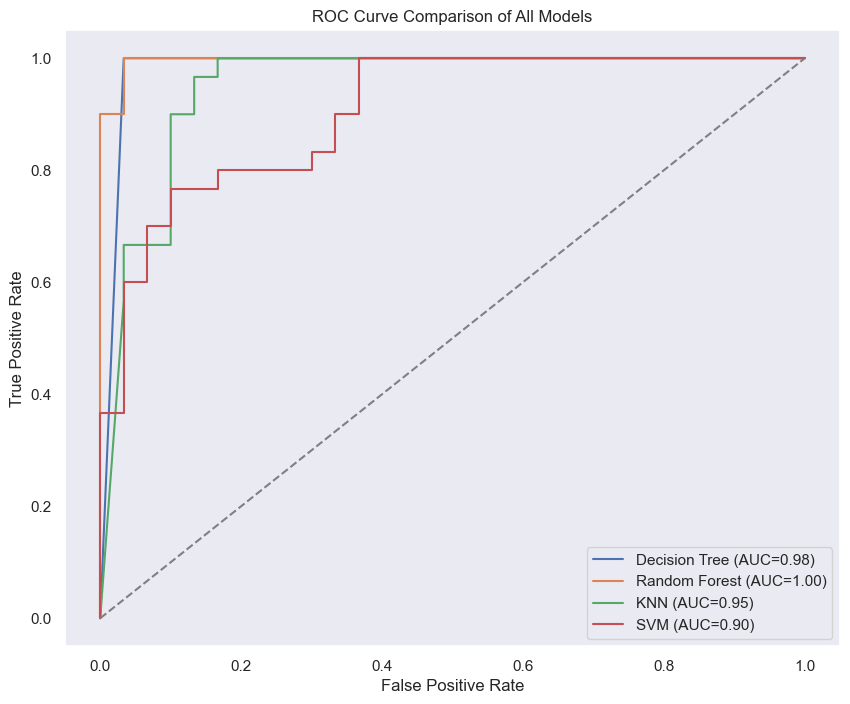

In [51]:
plt.figure(figsize=(10, 8))

# ROC Decision Tree
fpr_dt, tpr_dt, _ = roc_curve(y_test_binary, y_proba_dt)
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC={roc_auc_dt:.2f})')

# ROC Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test_binary, y_proba_rf)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC={roc_auc_rf:.2f})')

# ROC KNN
fpr_knn, tpr_knn, _ = roc_curve(y_test_binary, y_proba_knn)
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC={roc_auc_knn:.2f})')

# ROC SVM
fpr_svm, tpr_svm, _ = roc_curve(y_test_binary, y_proba_svm)
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC={roc_auc_svm:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison of All Models')
plt.legend(loc='lower right')
plt.grid()
plt.show()


In [52]:
# Logistic Regression hyperparameter tuning
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs', 'saga'],
    'penalty': ['l1', 'l2'],
    'max_iter': [1000, 2000]
}

grid_search_lr = GridSearchCV(LogisticRegression(), param_grid_lr, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_lr.fit(X_train_reduced, y_train_binary)

print("Logistic Regression Best Params:", grid_search_lr.best_params_)
print("Best Logistic Regression Accuracy (CV):", grid_search_lr.best_score_)

# Evaluate Logistic Regression model on test data
y_pred_lr = grid_search_lr.predict(X_test_reduced)
y_proba_lr = grid_search_lr.predict_proba(X_test_reduced)[:, 1]

# Logistic Regression evaluation metrics
accuracy_lr = accuracy_score(y_test_binary, y_pred_lr)
precision_lr = precision_score(y_test_binary, y_pred_lr)
recall_lr = recall_score(y_test_binary, y_pred_lr)
f1_lr = f1_score(y_test_binary, y_pred_lr)
roc_auc_lr = roc_auc_score(y_test_binary, y_proba_lr)

print("\nLogistic Regression Evaluation Metrics:")
print(f"Accuracy: {accuracy_lr:.4f}")
print(f"Precision: {precision_lr:.4f}")
print(f"Recall: {recall_lr:.4f}")
print(f"F1 Score: {f1_lr:.4f}")
print(f"ROC-AUC Score: {roc_auc_lr:.4f}")


Logistic Regression Best Params: {'C': 10, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'liblinear'}
Best Logistic Regression Accuracy (CV): 0.9785714285714284

Logistic Regression Evaluation Metrics:
Accuracy: 0.9500
Precision: 0.9355
Recall: 0.9667
F1 Score: 0.9508
ROC-AUC Score: 0.9911


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
50 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_l

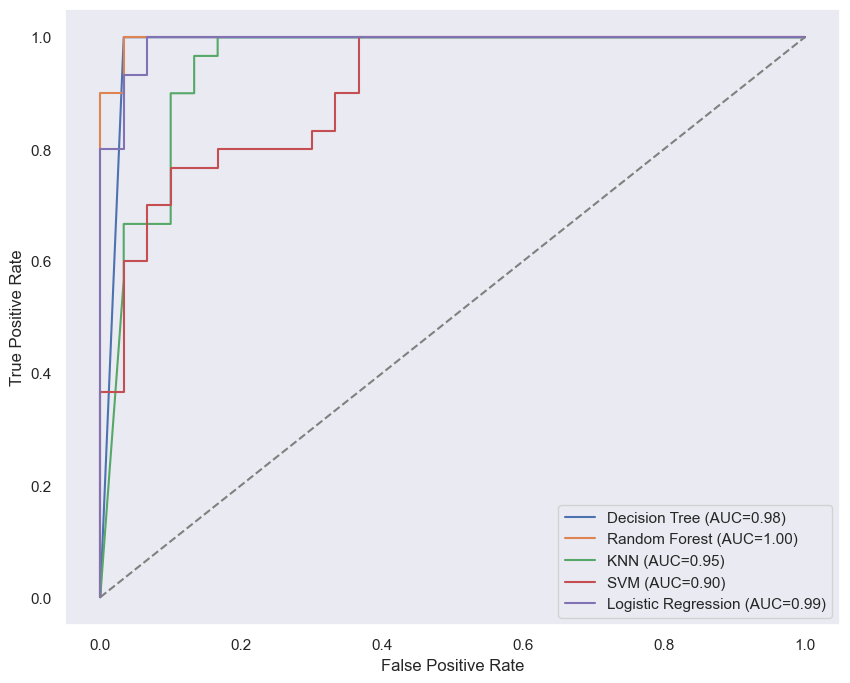

In [53]:
# Plot ROC curves for all models including Logistic Regression
plt.figure(figsize=(10, 8))

# ROC Decision Tree
fpr_dt, tpr_dt, _ = roc_curve(y_test_binary, y_proba_dt)
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC={roc_auc_dt:.2f})')

# ROC Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test_binary, y_proba_rf)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC={roc_auc_rf:.2f})')

# ROC KNN
fpr_knn, tpr_knn, _ = roc_curve(y_test_binary, y_proba_knn)
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC={roc_auc_knn:.2f})')

# ROC SVM
fpr_svm, tpr_svm, _ = roc_curve(y_test_binary, y_proba_svm)
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC={roc_auc_svm:.2f})')

# ROC Logistic Regression (added)
fpr_lr, tpr_lr, _ = roc_curve(y_test_binary, y_proba_lr)
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC={roc_auc_lr:.2f})')

# Plotting diagonal line for baseline
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Graph title and legend
#plt.title('ROC Curve Comparison of All Models')
plt.legend(loc='lower right')

# Grid lines for clarity
plt.grid()

# Display plot
plt.savefig('rocgraph_6_features.jpeg')
plt.show()


In [54]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Non-Epileptic', 'Epileptic'],
                yticklabels=['Non-Epileptic', 'Epileptic'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()


In [65]:
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def plot_roc_and_confusion_matrix(y_true, y_pred, y_proba, model_name):
    # Calculate ROC curve values
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    roc_auc = roc_auc_score(y_true, y_proba)

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)

    # Create figure with 1 row, 2 subplots
    fig, axs = plt.subplots(1, 2, figsize=(14, 5))

    # --- ROC Curve ---
    axs[0].plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}', linewidth=2)
    axs[0].plot([0, 1], [0, 1], linestyle='--', color='gray')
    axs[0].set_title(f'{model_name} ROC Curve', fontsize=14)
    axs[0].set_xlabel('False Positive Rate')
    axs[0].set_ylabel('True Positive Rate')
    axs[0].legend(loc='lower right')
    axs[0].grid(True)

    # --- Confusion Matrix ---
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Non-Epileptic', 'Epileptic'],
                yticklabels=['Non-Epileptic', 'Epileptic'],
                ax=axs[1])
    axs[1].set_title(f'{model_name} Confusion Matrix', fontsize=14)
    axs[1].set_xlabel('Predicted')
    axs[1].set_ylabel('Actual')

    plt.tight_layout()
    plt.show()

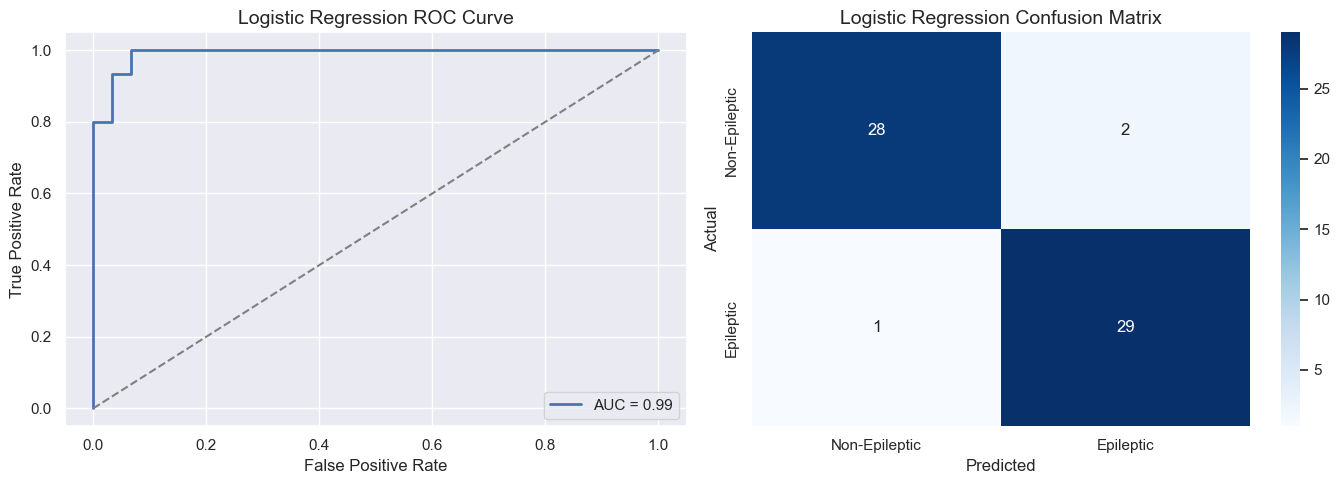

In [66]:
# Logistic Regression
plot_roc_and_confusion_matrix(y_test_binary, y_pred_lr, y_proba_lr, 'Logistic Regression')

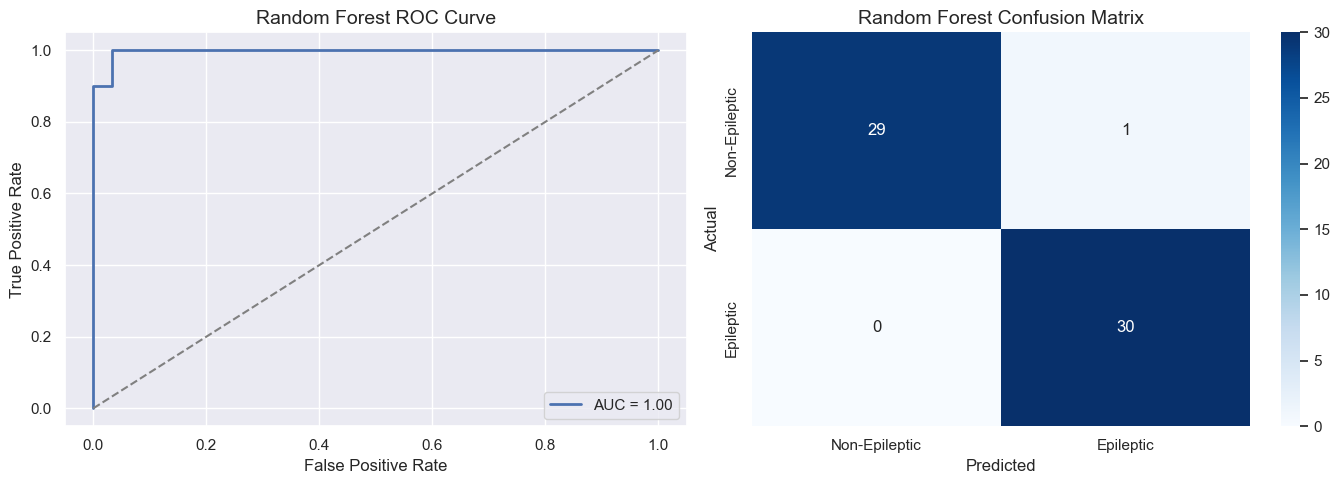

In [67]:
#RF
y_test_binary = y_test.map({1: 1, 2: 0})

# Fix RF predictions if class '2' exists
y_pred_rf = rf_grid.predict(X_test_reduced)
y_pred_rf = np.where(y_pred_rf == 2, 0, y_pred_rf)  # convert any 2s to 0

plot_roc_and_confusion_matrix(y_test_binary, y_pred_rf, y_proba_rf, 'Random Forest')


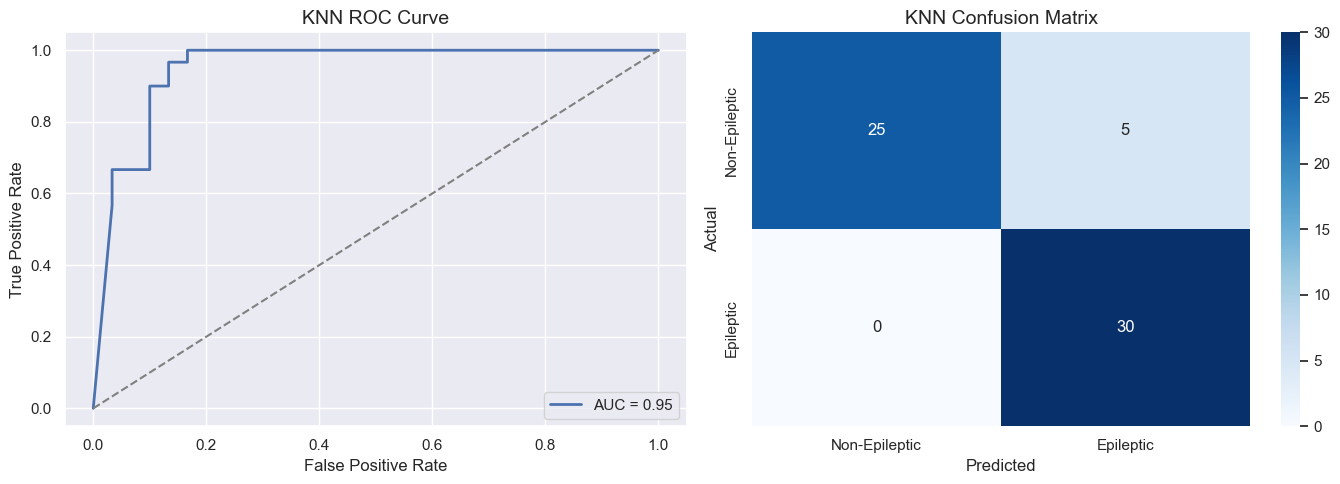

In [68]:
# KNN
plot_roc_and_confusion_matrix(y_test_binary, y_pred_knn, y_proba_knn, 'KNN')

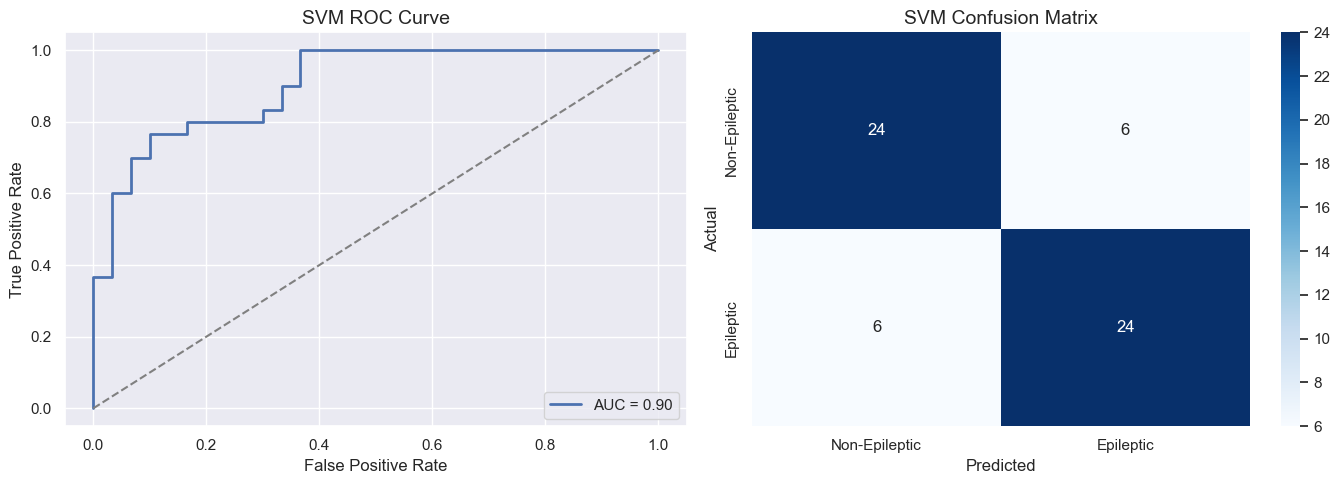

In [69]:
# SVM
plot_roc_and_confusion_matrix(y_test_binary, y_pred_svm, y_proba_svm, 'SVM')

In [70]:
from itertools import combinations

# Assume top_features is a list of your 6 best features
top_features = ['fr_d', 'fr_b', 'fr_g', 'cd6_d', 'fr_t', 'pow_d']

results = []

for r in range(len(top_features), 1, -1): 
    for combo in combinations(top_features, r):
        X_train_subset = X_train[top_features].loc[:, combo]
        X_test_subset = X_test[top_features].loc[:, combo]

        # Train model (e.g. Random Forest or LR)
        model = LogisticRegression(max_iter=1000)
        model.fit(X_train_subset, y_train_binary)
        y_proba = model.predict_proba(X_test_subset)[:, 1]
        auc = roc_auc_score(y_test_binary, y_proba)

        results.append((combo, auc))

        if auc < 0.8:
            print(f"Below threshold: {combo} => AUC = {auc:.2f}")


Below threshold: ('fr_b', 'fr_g', 'cd6_d') => AUC = 0.68
Below threshold: ('fr_b', 'fr_g') => AUC = 0.69
Below threshold: ('fr_b', 'cd6_d') => AUC = 0.75
Below threshold: ('fr_g', 'cd6_d') => AUC = 0.69


In [71]:
from itertools import combinations
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

top_features = ['fr_d', 'fr_b', 'fr_g', 'cd6_d', 'fr_t', 'pow_d']

results_4feat = []

for combo in combinations(top_features, 4):
    X_train_subset = X_train[top_features].loc[:, combo]
    X_test_subset = X_test[top_features].loc[:, combo]

    model = LogisticRegression(max_iter=1000)
    model.fit(X_train_subset, y_train_binary)
    y_proba = model.predict_proba(X_test_subset)[:, 1]
    auc = roc_auc_score(y_test_binary, y_proba)

    results_4feat.append((combo, auc))
    print(f"{combo} => AUC = {auc:.2f}")


('fr_d', 'fr_b', 'fr_g', 'cd6_d') => AUC = 0.97
('fr_d', 'fr_b', 'fr_g', 'fr_t') => AUC = 0.95
('fr_d', 'fr_b', 'fr_g', 'pow_d') => AUC = 0.99
('fr_d', 'fr_b', 'cd6_d', 'fr_t') => AUC = 0.97
('fr_d', 'fr_b', 'cd6_d', 'pow_d') => AUC = 1.00
('fr_d', 'fr_b', 'fr_t', 'pow_d') => AUC = 1.00
('fr_d', 'fr_g', 'cd6_d', 'fr_t') => AUC = 0.96
('fr_d', 'fr_g', 'cd6_d', 'pow_d') => AUC = 0.98
('fr_d', 'fr_g', 'fr_t', 'pow_d') => AUC = 0.98
('fr_d', 'cd6_d', 'fr_t', 'pow_d') => AUC = 0.92
('fr_b', 'fr_g', 'cd6_d', 'fr_t') => AUC = 0.94
('fr_b', 'fr_g', 'cd6_d', 'pow_d') => AUC = 0.92
('fr_b', 'fr_g', 'fr_t', 'pow_d') => AUC = 0.99
('fr_b', 'cd6_d', 'fr_t', 'pow_d') => AUC = 1.00
('fr_g', 'cd6_d', 'fr_t', 'pow_d') => AUC = 0.98


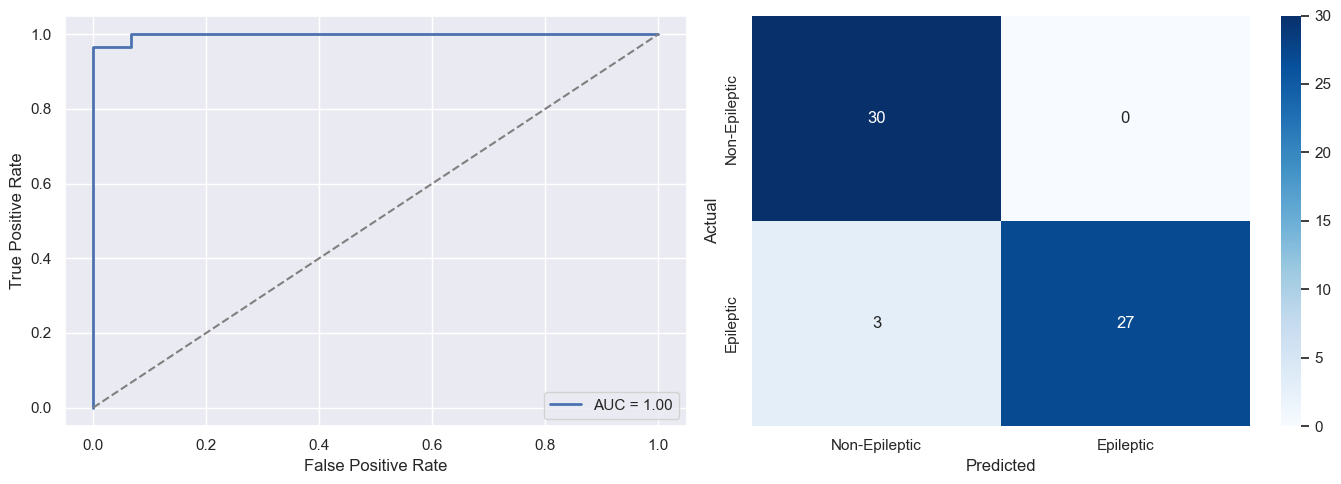


Evaluation Metrics (Best 4 Features):
Accuracy:  0.9500
Precision: 1.0000
Recall:    0.9000
F1 Score:  0.9474
ROC AUC:   0.9978


In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, roc_curve, confusion_matrix
)
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Select the best feature combination
best_features = ['fr_d', 'fr_b', 'cd6_d', 'pow_d']
X_train_best = X_train[best_features]
X_test_best = X_test[best_features]

# 2. Train the model
lr_best = LogisticRegression(max_iter=1000)
lr_best.fit(X_train_best, y_train_binary)

# 3. Predictions
y_pred_best = lr_best.predict(X_test_best)
y_proba_best = lr_best.predict_proba(X_test_best)[:, 1]

# 4. Metrics
roc_auc_best = roc_auc_score(y_test_binary, y_proba_best)
accuracy_best = accuracy_score(y_test_binary, y_pred_best)
precision_best = precision_score(y_test_binary, y_pred_best)
recall_best = recall_score(y_test_binary, y_pred_best)
f1_best = f1_score(y_test_binary, y_pred_best)

# 5. ROC Curve and Confusion Matrix in one plot
def plot_roc_and_confusion_matrix(y_true, y_pred, y_proba, model_name):
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    roc_auc = roc_auc_score(y_true, y_proba)
    cm = confusion_matrix(y_true, y_pred)

    fig, axs = plt.subplots(1, 2, figsize=(14, 5))

    # ROC
    axs[0].plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}', linewidth=2)
    axs[0].plot([0, 1], [0, 1], linestyle='--', color='gray')
    #axs[0].set_title(f'{model_name} ROC Curve')
    axs[0].set_xlabel('False Positive Rate')
    axs[0].set_ylabel('True Positive Rate')
    axs[0].legend(loc='lower right')
    axs[0].grid(True)

    # Confusion Matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Non-Epileptic', 'Epileptic'],
                yticklabels=['Non-Epileptic', 'Epileptic'],
                ax=axs[1])
    #axs[1].set_title(f'{model_name} Confusion Matrix')
    axs[1].set_xlabel('Predicted')
    axs[1].set_ylabel('Actual')

    plt.tight_layout()
    plt.savefig('logregression_4feat.jpeg')
    plt.show()

# 6. Plot it
plot_roc_and_confusion_matrix(y_test_binary, y_pred_best, y_proba_best, 'Logistic Regression (Best 4 Features)')

# 7. Optionally print metrics
print("\nEvaluation Metrics (Best 4 Features):")
print(f"Accuracy:  {accuracy_best:.4f}")
print(f"Precision: {precision_best:.4f}")
print(f"Recall:    {recall_best:.4f}")
print(f"F1 Score:  {f1_best:.4f}")
print(f"ROC AUC:   {roc_auc_best:.4f}")


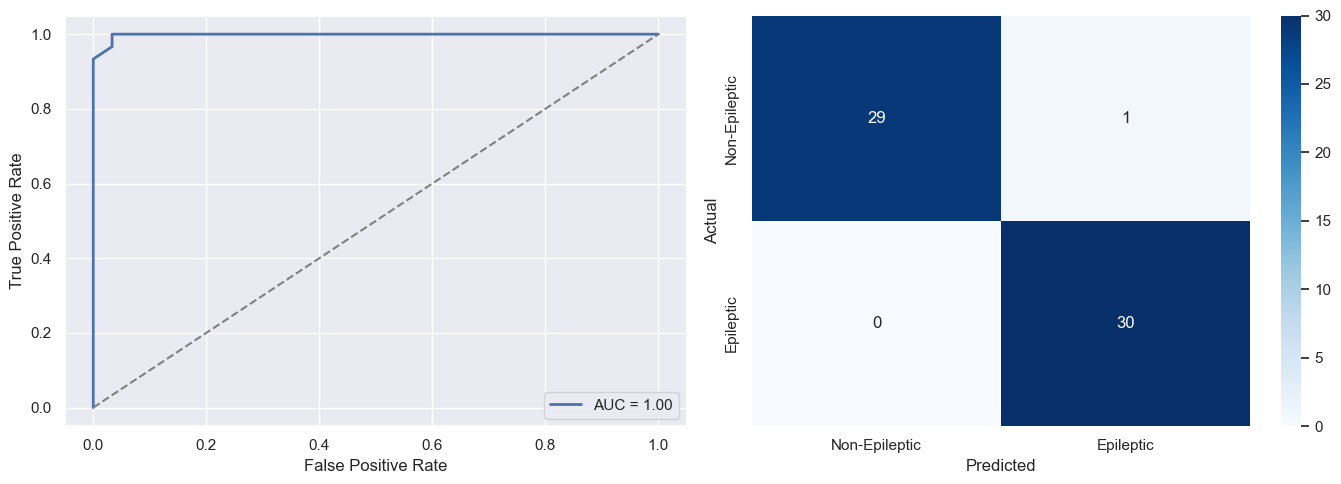


Random Forest Evaluation Metrics (Best 4 Features):
Accuracy:  0.9833
Precision: 0.9677
Recall:    1.0000
F1 Score:  0.9836
ROC AUC:   0.9983


In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, roc_curve, confusion_matrix
)
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Select the best 4 features
best_features = ['fr_d', 'fr_b', 'cd6_d', 'pow_d']
X_train_best = X_train[best_features]
X_test_best = X_test[best_features]

# 2. Train the Random Forest model
rf_best = RandomForestClassifier(random_state=42)
rf_best.fit(X_train_best, y_train_binary)

# 3. Make predictions
y_pred_rf_best = rf_best.predict(X_test_best)
y_proba_rf_best = rf_best.predict_proba(X_test_best)[:, 1]

# 4. Compute metrics
roc_auc_rf_best = roc_auc_score(y_test_binary, y_proba_rf_best)
accuracy_rf_best = accuracy_score(y_test_binary, y_pred_rf_best)
precision_rf_best = precision_score(y_test_binary, y_pred_rf_best)
recall_rf_best = recall_score(y_test_binary, y_pred_rf_best)
f1_rf_best = f1_score(y_test_binary, y_pred_rf_best)

# 5. Plot function (if not defined already)
def plot_roc_and_confusion_matrix(y_true, y_pred, y_proba, model_name):
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    roc_auc = roc_auc_score(y_true, y_proba)
    cm = confusion_matrix(y_true, y_pred)

    fig, axs = plt.subplots(1, 2, figsize=(14, 5))

    # ROC Curve
    axs[0].plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}', linewidth=2)
    axs[0].plot([0, 1], [0, 1], linestyle='--', color='gray')
    #axs[0].set_title(f'{model_name} ROC Curve')
    axs[0].set_xlabel('False Positive Rate')
    axs[0].set_ylabel('True Positive Rate')
    axs[0].legend(loc='lower right')
    axs[0].grid(True)

    # Confusion Matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Non-Epileptic', 'Epileptic'],
                yticklabels=['Non-Epileptic', 'Epileptic'],
                ax=axs[1])
    #axs[1].set_title(f'{model_name} Confusion Matrix')
    axs[1].set_xlabel('Predicted')
    axs[1].set_ylabel('Actual')

    plt.tight_layout()
    plt.savefig('rforest.jpeg')
    plt.show()

# 6. Plot for Random Forest
plot_roc_and_confusion_matrix(y_test_binary, y_pred_rf_best, y_proba_rf_best, 'Random Forest (Best 4 Features)')

# 7. Print evaluation metrics
print("\nRandom Forest Evaluation Metrics (Best 4 Features):")
print(f"Accuracy:  {accuracy_rf_best:.4f}")
print(f"Precision: {precision_rf_best:.4f}")
print(f"Recall:    {recall_rf_best:.4f}")
print(f"F1 Score:  {f1_rf_best:.4f}")
print(f"ROC AUC:   {roc_auc_rf_best:.4f}")


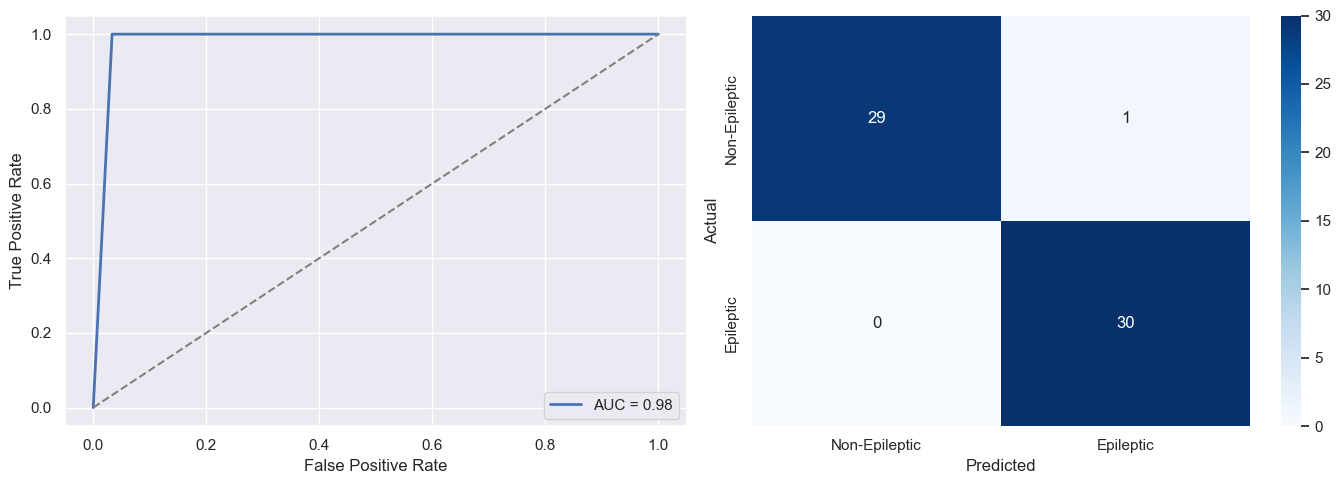


Decision Tree Evaluation Metrics (Best 4 Features):
Accuracy:  0.9833
Precision: 0.9677
Recall:    1.0000
F1 Score:  0.9836
ROC AUC:   0.9833


In [74]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, roc_curve, confusion_matrix
)
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Select the best 4 features
best_features = ['fr_d', 'fr_b', 'cd6_d', 'pow_d']
X_train_best = X_train[best_features]
X_test_best = X_test[best_features]

# 2. Train the Decision Tree model
dt_best = DecisionTreeClassifier(criterion='entropy', max_depth=None, min_samples_leaf=1, random_state=42)
dt_best.fit(X_train_best, y_train_binary)

# 3. Make predictions
y_pred_dt_best = dt_best.predict(X_test_best)
y_proba_dt_best = dt_best.predict_proba(X_test_best)[:, 1]

# 4. Compute metrics
roc_auc_dt_best = roc_auc_score(y_test_binary, y_proba_dt_best)
accuracy_dt_best = accuracy_score(y_test_binary, y_pred_dt_best)
precision_dt_best = precision_score(y_test_binary, y_pred_dt_best)
recall_dt_best = recall_score(y_test_binary, y_pred_dt_best)
f1_dt_best = f1_score(y_test_binary, y_pred_dt_best)

# 5. Reuse plot function
def plot_roc_and_confusion_matrix(y_true, y_pred, y_proba, model_name):
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    roc_auc = roc_auc_score(y_true, y_proba)
    cm = confusion_matrix(y_true, y_pred)

    fig, axs = plt.subplots(1, 2, figsize=(14, 5))

    # ROC Curve
    axs[0].plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}', linewidth=2)
    axs[0].plot([0, 1], [0, 1], linestyle='--', color='gray')
    #axs[0].set_title(f'{model_name} ROC Curve')
    axs[0].set_xlabel('False Positive Rate')
    axs[0].set_ylabel('True Positive Rate')
    axs[0].legend(loc='lower right')
    axs[0].grid(True)

    # Confusion Matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Non-Epileptic', 'Epileptic'],
                yticklabels=['Non-Epileptic', 'Epileptic'],
                ax=axs[1])
    #axs[1].set_title(f'{model_name} Confusion Matrix')
    axs[1].set_xlabel('Predicted')
    axs[1].set_ylabel('Actual')

    plt.tight_layout()
    plt.savefig('decisiontree_4feat.jpeg')
    plt.show()

# 6. Plot Decision Tree results
plot_roc_and_confusion_matrix(y_test_binary, y_pred_dt_best, y_proba_dt_best, 'Decision Tree (Best 4 Features)')

# 7. Print evaluation metrics
print("\nDecision Tree Evaluation Metrics (Best 4 Features):")
print(f"Accuracy:  {accuracy_dt_best:.4f}")
print(f"Precision: {precision_dt_best:.4f}")
print(f"Recall:    {recall_dt_best:.4f}")
print(f"F1 Score:  {f1_dt_best:.4f}")
print(f"ROC AUC:   {roc_auc_dt_best:.4f}")


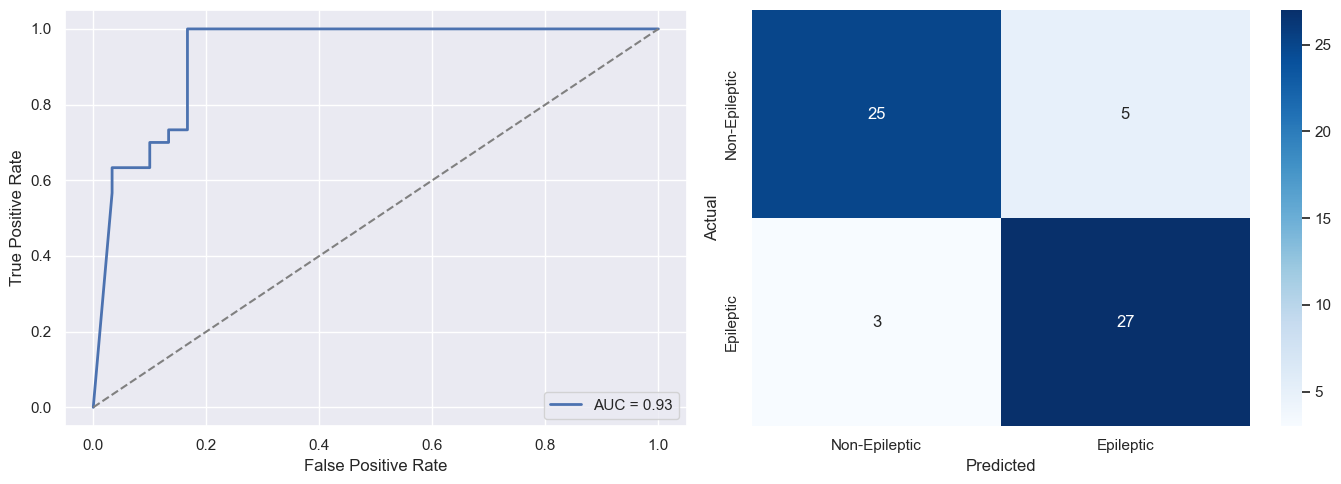


KNN Evaluation Metrics (Best 4 Features):
Accuracy:  0.8667
Precision: 0.8438
Recall:    0.9000
F1 Score:  0.8710
ROC AUC:   0.9328


In [75]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, roc_curve, confusion_matrix
)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Select best 4 features
best_features = ['fr_d', 'fr_b', 'cd6_d', 'pow_d']
X_train_best = X_train[best_features]
X_test_best = X_test[best_features]

# 2. Train the KNN model
knn_best = KNeighborsClassifier(n_neighbors=5, weights='distance', metric='minkowski')
knn_best.fit(X_train_best, y_train_binary)

# 3. Make predictions
y_pred_knn_best = knn_best.predict(X_test_best)
y_pred_knn_best = np.where(y_pred_knn_best == 2, 0, y_pred_knn_best)  # ensure binary labels
y_proba_knn_best = knn_best.predict_proba(X_test_best)[:, 1]

# 4. Compute evaluation metrics
roc_auc_knn_best = roc_auc_score(y_test_binary, y_proba_knn_best)
accuracy_knn_best = accuracy_score(y_test_binary, y_pred_knn_best)
precision_knn_best = precision_score(y_test_binary, y_pred_knn_best)
recall_knn_best = recall_score(y_test_binary, y_pred_knn_best)
f1_knn_best = f1_score(y_test_binary, y_pred_knn_best)

# 5. Reuse ROC + Confusion Matrix plotting function
def plot_roc_and_confusion_matrix(y_true, y_pred, y_proba, model_name):
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    roc_auc = roc_auc_score(y_true, y_proba)
    cm = confusion_matrix(y_true, y_pred)

    fig, axs = plt.subplots(1, 2, figsize=(14, 5))

    # ROC Curve
    axs[0].plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}', linewidth=2)
    axs[0].plot([0, 1], [0, 1], linestyle='--', color='gray')
    #axs[0].set_title(f'{model_name} ROC Curve')
    axs[0].set_xlabel('False Positive Rate')
    axs[0].set_ylabel('True Positive Rate')
    axs[0].legend(loc='lower right')
    axs[0].grid(True)

    # Confusion Matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Non-Epileptic', 'Epileptic'],
                yticklabels=['Non-Epileptic', 'Epileptic'],
                ax=axs[1])
    #axs[1].set_title(f'{model_name} Confusion Matrix')
    axs[1].set_xlabel('Predicted')
    axs[1].set_ylabel('Actual')

    plt.tight_layout()
    plt.savefig('knn_4feat.jpeg')
    plt.show()

# 6. Plot results
plot_roc_and_confusion_matrix(y_test_binary, y_pred_knn_best, y_proba_knn_best, 'KNN (Best 4 Features)')

# 7. Print metrics
print("\nKNN Evaluation Metrics (Best 4 Features):")
print(f"Accuracy:  {accuracy_knn_best:.4f}")
print(f"Precision: {precision_knn_best:.4f}")
print(f"Recall:    {recall_knn_best:.4f}")
print(f"F1 Score:  {f1_knn_best:.4f}")
print(f"ROC AUC:   {roc_auc_knn_best:.4f}")


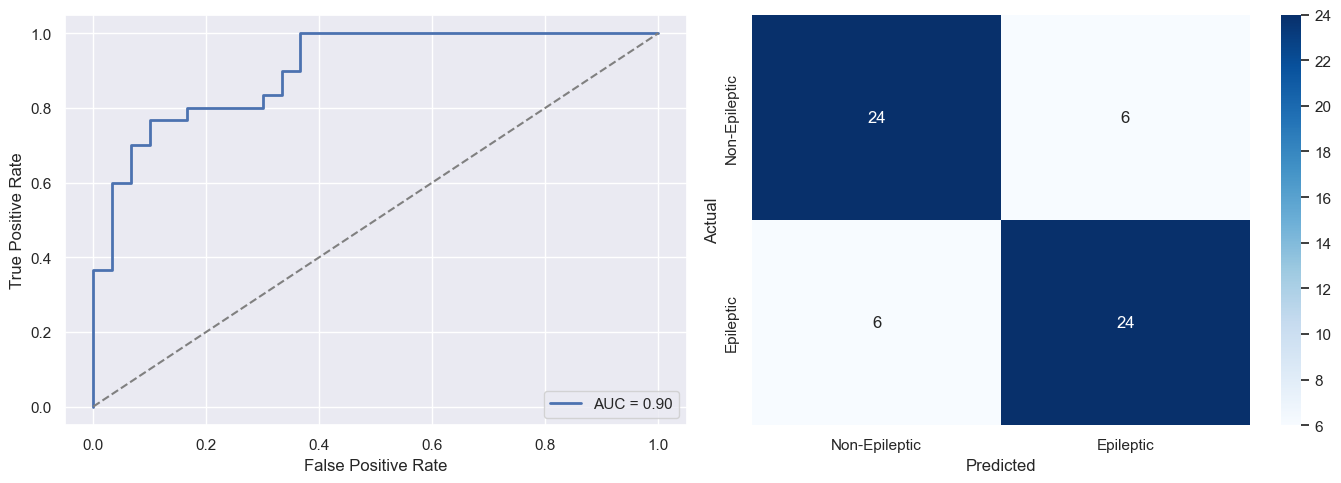


SVM Evaluation Metrics (Best 4 Features):
Accuracy:  0.8000
Precision: 0.8000
Recall:    0.8000
F1 Score:  0.8000
ROC AUC:   0.9044


In [76]:
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, roc_curve, confusion_matrix
)
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Select the best 4 features
best_features = ['fr_d', 'fr_b', 'cd6_d', 'pow_d']
X_train_best = X_train[best_features]
X_test_best = X_test[best_features]

# 2. Train the SVM model with probability=True
svm_best = SVC(kernel='rbf', C=1, gamma='scale', probability=True, random_state=42)
svm_best.fit(X_train_best, y_train_binary)

# 3. Make predictions
y_pred_svm_best = svm_best.predict(X_test_best)
y_proba_svm_best = svm_best.predict_proba(X_test_best)[:, 1]

# 4. Compute evaluation metrics
roc_auc_svm_best = roc_auc_score(y_test_binary, y_proba_svm_best)
accuracy_svm_best = accuracy_score(y_test_binary, y_pred_svm_best)
precision_svm_best = precision_score(y_test_binary, y_pred_svm_best)
recall_svm_best = recall_score(y_test_binary, y_pred_svm_best)
f1_svm_best = f1_score(y_test_binary, y_pred_svm_best)

# 5. Reuse ROC + Confusion Matrix plotter
def plot_roc_and_confusion_matrix(y_true, y_pred, y_proba, model_name):
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    roc_auc = roc_auc_score(y_true, y_proba)
    cm = confusion_matrix(y_true, y_pred)

    fig, axs = plt.subplots(1, 2, figsize=(14, 5))

    # ROC Curve
    axs[0].plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}', linewidth=2)
    axs[0].plot([0, 1], [0, 1], linestyle='--', color='gray')
    #axs[0].set_title(f'{model_name} ROC Curve')
    axs[0].set_xlabel('False Positive Rate')
    axs[0].set_ylabel('True Positive Rate')
    axs[0].legend(loc='lower right')
    axs[0].grid(True)

    # Confusion Matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Non-Epileptic', 'Epileptic'],
                yticklabels=['Non-Epileptic', 'Epileptic'],
                ax=axs[1])
    #axs[1].set_title(f'{model_name} Confusion Matrix')
    axs[1].set_xlabel('Predicted')
    axs[1].set_ylabel('Actual')

    plt.tight_layout()
    plt.savefig('svm_4feat.jpeg')
    plt.show()

# 6. Plot
plot_roc_and_confusion_matrix(y_test_binary, y_pred_svm_best, y_proba_svm_best, 'SVM (Best 4 Features)')

# 7. Print evaluation metrics
print("\nSVM Evaluation Metrics (Best 4 Features):")
print(f"Accuracy:  {accuracy_svm_best:.4f}")
print(f"Precision: {precision_svm_best:.4f}")
print(f"Recall:    {recall_svm_best:.4f}")
print(f"F1 Score:  {f1_svm_best:.4f}")
print(f"ROC AUC:   {roc_auc_svm_best:.4f}")


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Recalculate fpr, tpr for each model using the best 4-feature predictions
fpr_lr, tpr_lr, _ = roc_curve(y_test_binary, y_proba_best)             # Logistic Regression
fpr_rf, tpr_rf, _ = roc_curve(y_test_binary, y_proba_rf_best)          # Random Forest
fpr_dt, tpr_dt, _ = roc_curve(y_test_binary, y_proba_dt_best)          # Decision Tree
fpr_knn, tpr_knn, _ = roc_curve(y_test_binary, y_proba_knn_best)       # KNN
fpr_svm, tpr_svm, _ = roc_curve(y_test_binary, y_proba_svm_best)       # SVM

# AUC scores
auc_lr = roc_auc_score(y_test_binary, y_proba_best)
auc_rf = roc_auc_score(y_test_binary, y_proba_rf_best)
auc_dt = roc_auc_score(y_test_binary, y_proba_dt_best)
auc_knn = roc_auc_score(y_test_binary, y_proba_knn_best)
auc_svm = roc_auc_score(y_test_binary, y_proba_svm_best)

# Plotting
plt.figure(figsize=(10, 8))

plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.2f})', linewidth=2)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})', linewidth=2)
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.2f})', linewidth=2)
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {auc_knn:.2f})', linewidth=2)
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {auc_svm:.2f})', linewidth=2)

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

#plt.title('ROC Curve Comparison of Models (Best 4 Features)', fontsize=16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.savefig('rocgraph_4_features.jpeg')
plt.show()


In [ ]:
#pip install seaborn --upgrade